In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot')

In [84]:
df= pd.read_csv("application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [85]:
df.shape

(307511, 122)

In [86]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [87]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [88]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

convert the null values into percentage for better understanding

In [89]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [90]:
null_col=df.isnull().sum().sort_values(ascending=True)
null_col=null_col[null_col>(0.35*len(df))]
null_col

EMERGENCYSTATE_MODE             145755
TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
HOUSETYPE_MODE                  154297
LIVINGAREA_AVG                  154350
LIVINGAREA_MODE                 154350
LIVINGAREA_MEDI                 154350
ENTRANCES_AVG                   154828
ENTRANCES_MODE                  154828
ENTRANCES_MEDI                  154828
APARTMENTS_MEDI                 156061
APARTMENTS_AVG                  156061
APARTMENTS_MODE                 156061
WALLSMATERIAL_MODE              156341
ELEVATORS_MEDI                  163891
ELEVATORS_AVG                   163891
ELEVATORS_MODE                  163891
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MEDI              169682
EXT_SOURCE_1             

plotting a bar grap for missing values more than 35%

Text(0, 0.5, 'count of null values')

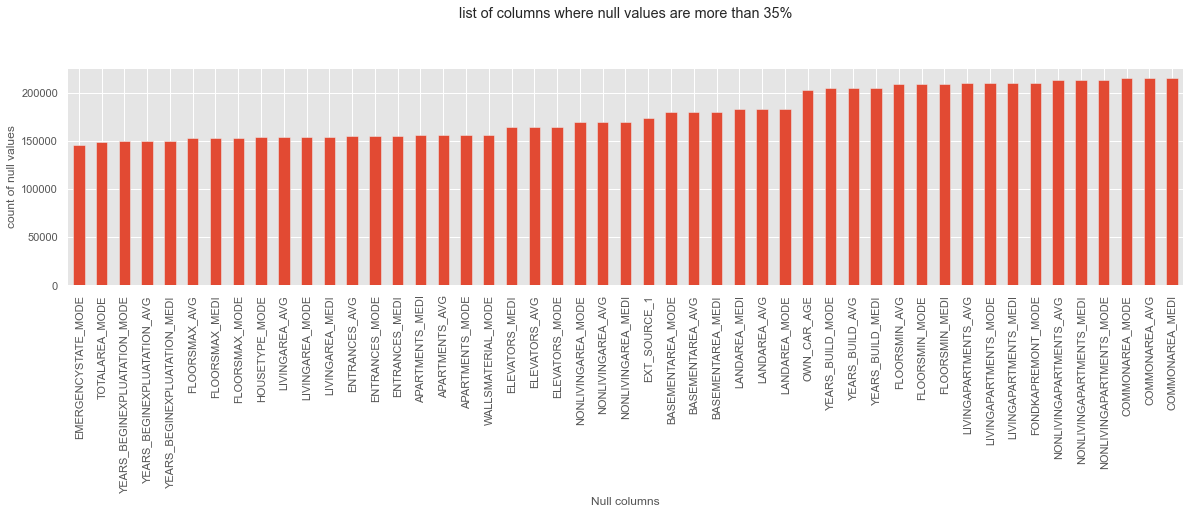

In [91]:
plt.figure(figsize=(20,4))
null_col.plot(kind="bar")
plt.title("list of columns where null values are more than 35%")
plt.xlabel("Null columns")
plt.ylabel("count of null values")

In [92]:
len(null_col) #total no of columns having missing values more than 35

49

In [93]:
df.drop(columns=((['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI',
       'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MODE', 'COMMONAREA_AVG',
       'COMMONAREA_MEDI'])),inplace=True)

In [94]:
df.shape

(307511, 73)

In [95]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(50)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


replacing the missing values with mode()


In [96]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

cross checking the missing values

In [97]:

(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

we can observe occupation type is still not converted or removed because fillinig it with mean does not make any sense


In [98]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [99]:
df[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

getting the columns which start with DAYS

In [100]:
days_column=[]
for i in df:
    if i.startswith('DAYS'):
        days_column.append(i)
print(days_column)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


As we observe the these columns have negative values which does not make any sense 
so we convert all the negative values to positive by using .abs()

In [101]:
df["DAYS_BIRTH"]=df["DAYS_BIRTH"].abs()

In [102]:
df["DAYS_REGISTRATION"]=df["DAYS_REGISTRATION"].abs()

In [103]:
df['DAYS_ID_PUBLISH']=df['DAYS_ID_PUBLISH'].abs()

In [104]:
df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].abs()


cross check if the number are converted into positive numbers

In [105]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([1134.,  828.,  815., ..., 3988., 3899., 3538.])

converting Y and N into 1 and 0 

In [106]:
df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].map({"Y":1,"N":0})

In [107]:
df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].map({"Y":1,"N":0})

In [108]:
df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As we can observe that XNA is not relatible so we can rename XNA into F

In [109]:
df.loc[df["CODE_GENDER"]=="XNA","CODE_GENDER"]="F"

In [110]:
df["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [111]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

we can see "XNA" in the Organization type
using the same method to change it

In [112]:

df["AMT_INCOME_TOTAL"].value_counts()      
        

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

we can observe that the pensioner value is approximately equal to the null value of ORGANIZATION_TYPE.Hence the value is missing at random
we will replace XNA with Persioner

In [113]:
df["ORGANIZATION_TYPE"]=df["ORGANIZATION_TYPE"].replace("XNA","pensioner")
df["ORGANIZATION_TYPE"].fillna("Pensioner",inplace=True)

we have some columns which have nominal values(i.e the do not have any natural order) so in order to convert these value into catagorical value we should use binning
When should I apply binning?
Binning or discretization is used for the transformation of a continuous or numerical variable into a categorical feature.
Binning of continuous variable introduces non-linearity and tends to improve the performance of the model.
It can be also used to identify missing values or outliers

In [172]:
df["NAME_INCOME_TYPE"]= pd.qcut(df["AMT_INCOME_TOTAL"], q=[0, 0.2 ,0.5, 0.8,0.95, 1],labels=['Very_low','Low',"Medium","High","Very_High"])
df["NAME_INCOME_TYPE"].head()

0      Medium
1        High
2    Very_low
3         Low
4         Low
Name: NAME_INCOME_TYPE, dtype: category
Categories (5, object): ['Very_low' < 'Low' < 'Medium' < 'High' < 'Very_High']

In [115]:
df["AMT_CREDIT_TYPE"]= pd.qcut(df["AMT_CREDIT"],q=[0, 0.2 ,0.5, 0.8, 0.95, 1],labels=['Very_low','Low','Medium','High','Very_High'])
df["AMT_CREDIT_TYPE"].head(11)

0           Low
1          High
2      Very_low
3           Low
4           Low
5           Low
6     Very_High
7     Very_High
8          High
9           Low
10       Medium
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['Very_low' < 'Low' < 'Medium' < 'High' < 'Very_High']

Now we will bin days birth into age group

In [116]:
df["DAYS_BIRTH"]=(df["DAYS_BIRTH"]/365).astype(int)
df["DAYS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [117]:
df["AGE_GROUP"]=pd.cut(df["DAYS_BIRTH"],bins=(15,25,35,60,100),labels=["Very_young","Young","Middle_aged","Old"])

In [118]:
df[["AGE_GROUP","DAYS_BIRTH"]].head()

AGE_GROUP  DAYS_BIRTH
0   Very_young          25
1  Middle_aged          45
2  Middle_aged          52
3  Middle_aged          52
4  Middle_aged          54

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [120]:
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].astype('category')
df['CODE_GENDER'] = df['CODE_GENDER'].astype('category')
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype('category')
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('category')
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('category')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].astype('category')
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('category')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('category')
df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].astype('category')
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].astype('category')

we can see there are some columns we have nothing to do with so we can drop it 

In [121]:
drop_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
len(drop_columns)

31

In [122]:
df.drop(columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],inplace=True)

In [123]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied           Medium   
1        1129500.0          Family             High   
2         135000.0   Unaccompanied         Very_low   
3         297000.0   Unaccompanied              Low   
4         513000.0   Unaccompanied              Low   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25           -637             3648.0   
1                    0.003541          45          -1188             1186.0   
2                    0.010032          52           -225             4260.0   
3                    0.008019          52          -3039             9833.0   
4                    0.028663          54          -3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1        

Outliers

In [124]:
number_col=df.select_dtypes(include='number').columns #getting all the columns which are numeric

In [125]:
len(number_col)

35

In [126]:
import warnings
warnings.filterwarnings('ignore')

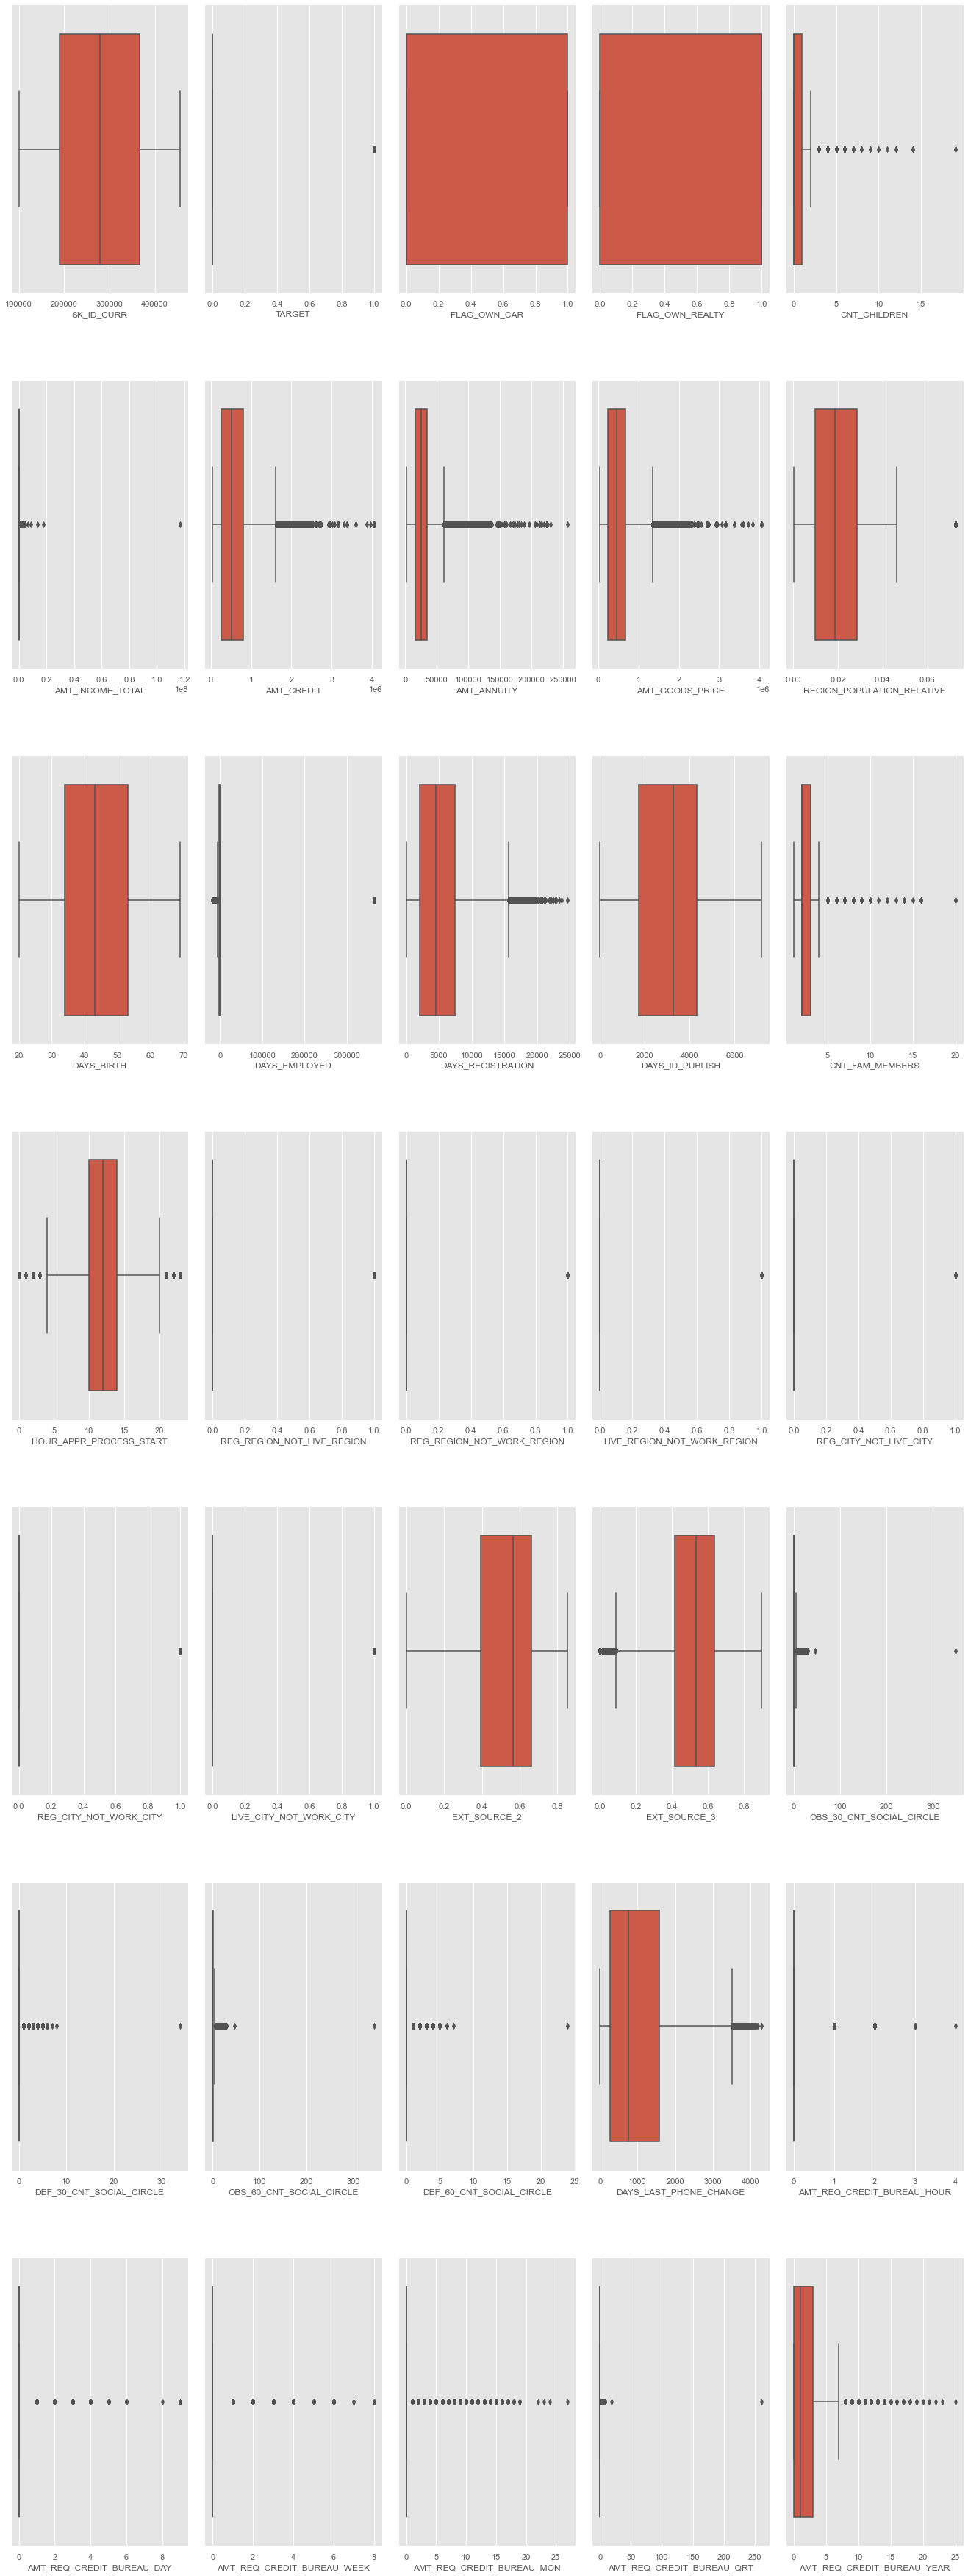

In [127]:
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),number_col):        #Using For loop 

    sns.boxplot(df[column],ax=ax) 

# Observation:
-->  CNT_CHILDREN have outlier values having children more than 5.
-->  IQR for AMT_INCOME_TOTAL is very slim and it has a large number of outliers.
-->  Third quartile of AMT_CREDIT is larger as compared to the First quartile which means that most of the Credit amount of the loan of customers are present in the third quartile. And there are a large number of outliers present in AMT_CREDIT.
-->  The third quartile AMT_ANNUITY is slightly larger than the First quartile and there is a large number of outliers.
-->  Third quartile of AMT_GOODS_PRICE,DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE is larger as compared to the First quartile and all have a large number of outliers.
-->  IQR for DAYS EMPLOYED is very slim. Most of the outliers are present below 25000. And an outlier is present 375000.
-->  From boxplot of CNT_FAM_MEMBERS , we can say that most of the clients have 4 family members. There are some outliers present.
-->  DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3 don’t have any outliers.
-->  Boxplot for DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEARare very slim and have a large number of outliers.
-->  FLAG_OWN_CAR : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that most of the clients own a car
-->  FLAG_OWN_REALTY : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that  most of the clients own a House/Flat-->  

# Checking for imbalance data in Target Variable

In [128]:
Target_zero=df.loc[df.TARGET==0]

In [129]:
Target_one=df.loc[df.TARGET==1]

In [130]:
len(Target_zero)/len(Target_one)

11.387150050352467

so the Imbalance ratio of Target variable is 11.3 approx

we can also check the data imbalance by using Pie chart

282686
24825


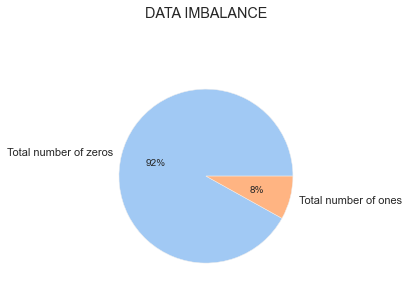

In [131]:
no_of_zero=0
no_of_one=0
for i in df["TARGET"].values:
    if i==1:
        no_of_one += 1
    else:
        no_of_zero +=1
print(no_of_zero)
print(no_of_one)
ZEROs = no_of_zero / len(df["TARGET"])*100    #percentage of zero's in Target variable
ONEs = no_of_one / len(df["TARGET"])*100       #percentage of ones's in Target variable
x= ["Total number of zeros", "Total number of ones"]
y=[ZEROs,ONEs]



#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(y, labels = x, colors = colors, autopct='%.0f%%')
plt.title("DATA IMBALANCE")
plt.show()       
        

Observation:
92% zero population
8% one population
Ratio = 11.3

# Univariate Analysis of categorical columns with respect to TARGET variable

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [133]:
df.AGE_GROUP 

0          Very_young
1         Middle_aged
2         Middle_aged
3         Middle_aged
4         Middle_aged
             ...     
307506     Very_young
307507    Middle_aged
307508    Middle_aged
307509          Young
307510    Middle_aged
Name: AGE_GROUP, Length: 307511, dtype: category
Categories (4, object): ['Very_young' < 'Young' < 'Middle_aged' < 'Old']

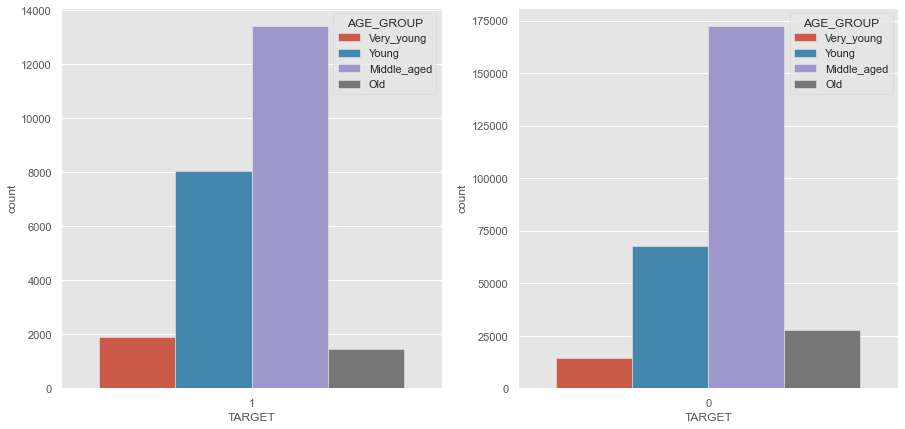

In [134]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target_one)
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target_zero)
plt.show()

Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
Also, Middle Age group facing paying difficulties the most.
While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.

<Figure size 2880x360 with 0 Axes>

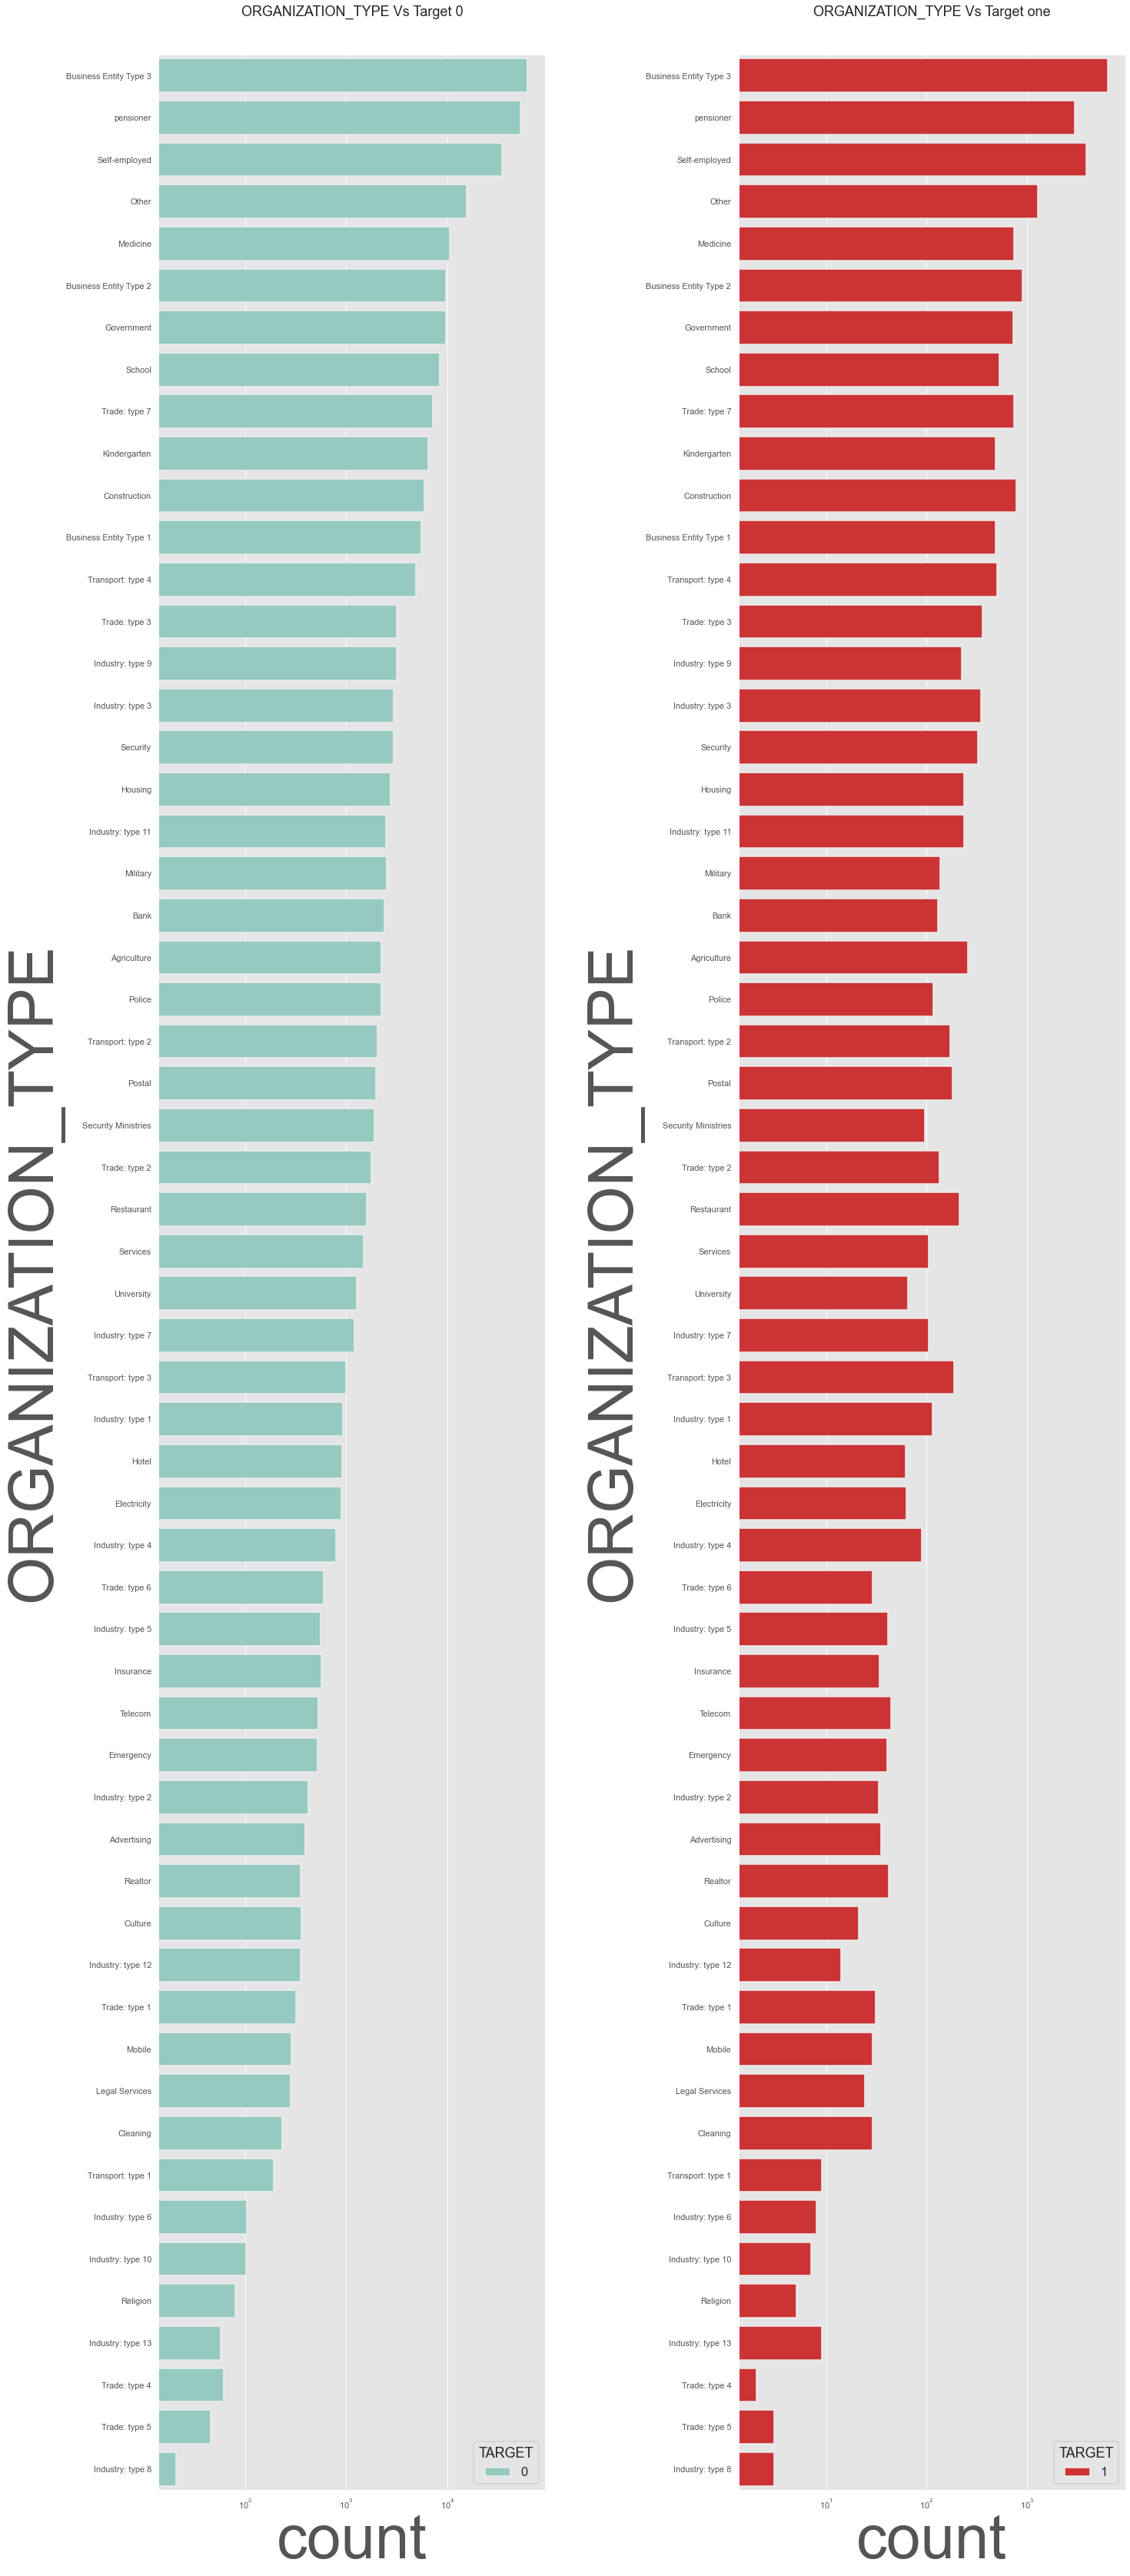

In [135]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target_zero,y='ORGANIZATION_TYPE',
              order=df['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target_one,y='ORGANIZATION_TYPE',
              order=df['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target one")



plt.show();

OBSERVATION:(Defaulters as well as Non-defaulters) Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others
(Defaulters as well as Non-defaulters) Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.

In [136]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target_zero, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target_one, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

In [137]:
categorical_col = list(df.select_dtypes(include= 'category').columns) 


# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE') 
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col #Checking after removing columns


['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_CREDIT_TYPE']

In [138]:
# for cat in categorical_col:
#     categorical_plot(cat)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

# Univariate anlysis with numerical columns 

what is univariate anlysis?
univariate analysis is the simplest form of analysis which consists of only one variable.
Here the data contains just one variable and does not have to deal with the relationship of a cause and effect.
Like for example consider a survey of a classroom. The analysts would want to count the number of boys and girls in the room.
The data here simply talks about the number which is a single variable and the variable quantity.
The main objective of the univariate analysis is
to describe the data in order to find out the patterns in the data.
This is done by looking at the mean, mode, median, standard deviation, dispersion, etc.

In [140]:
def univariate(c):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target_zero[c], color="g" )
    plt.yscale('linear') 
    plt.xlabel(c, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target_one[c], color="r")
    plt.yscale('linear')    
    plt.xlabel(c, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show()

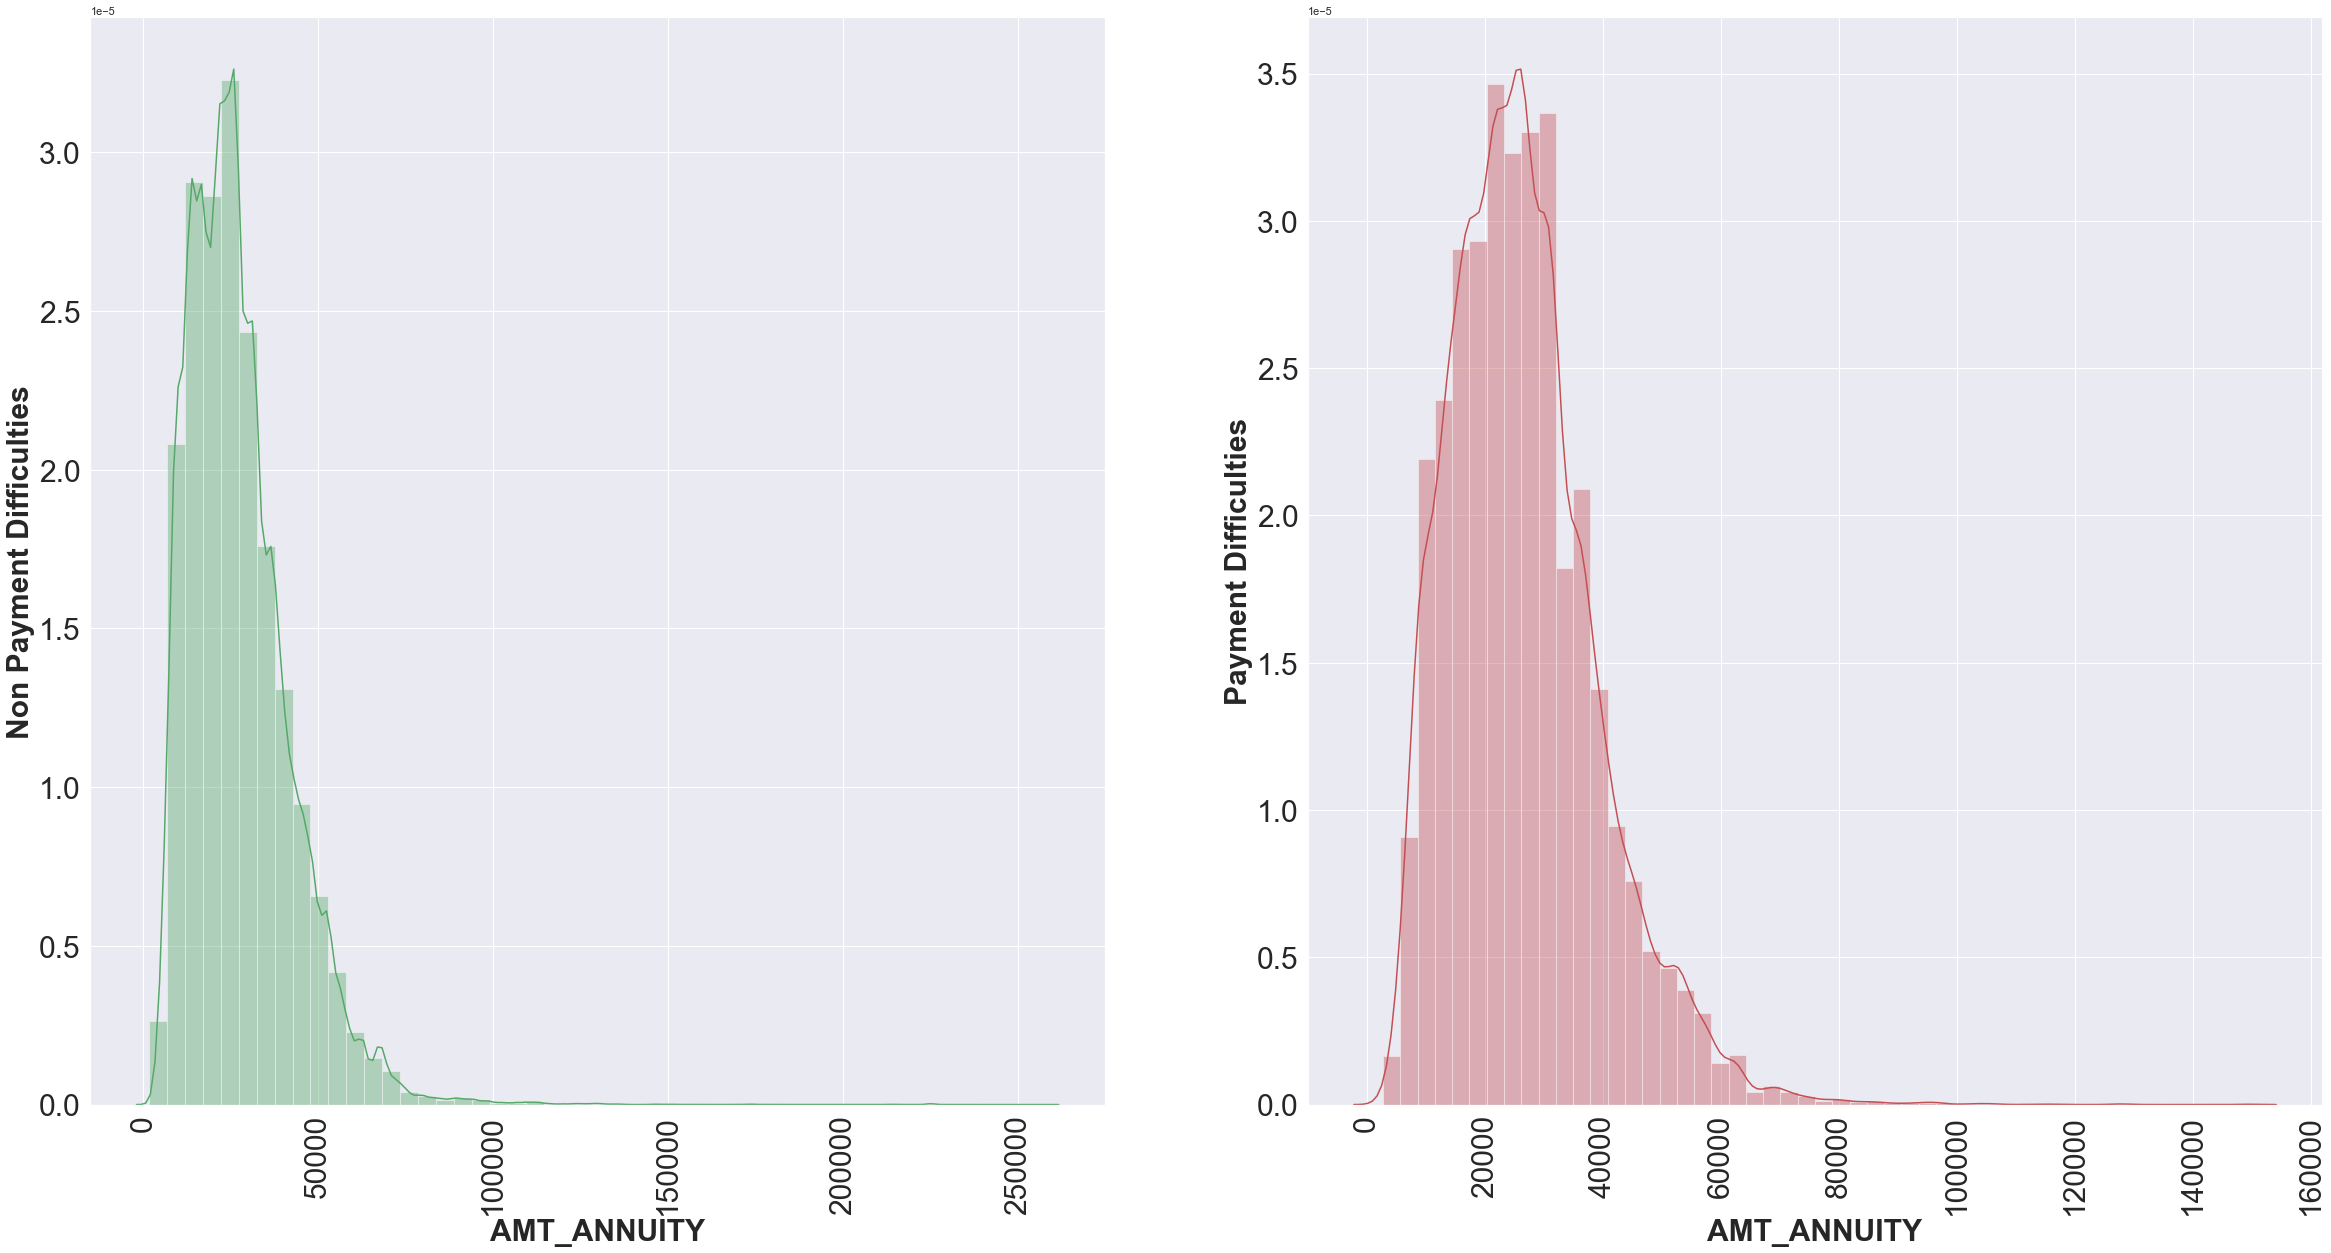

In [141]:
univariate(c='AMT_ANNUITY')

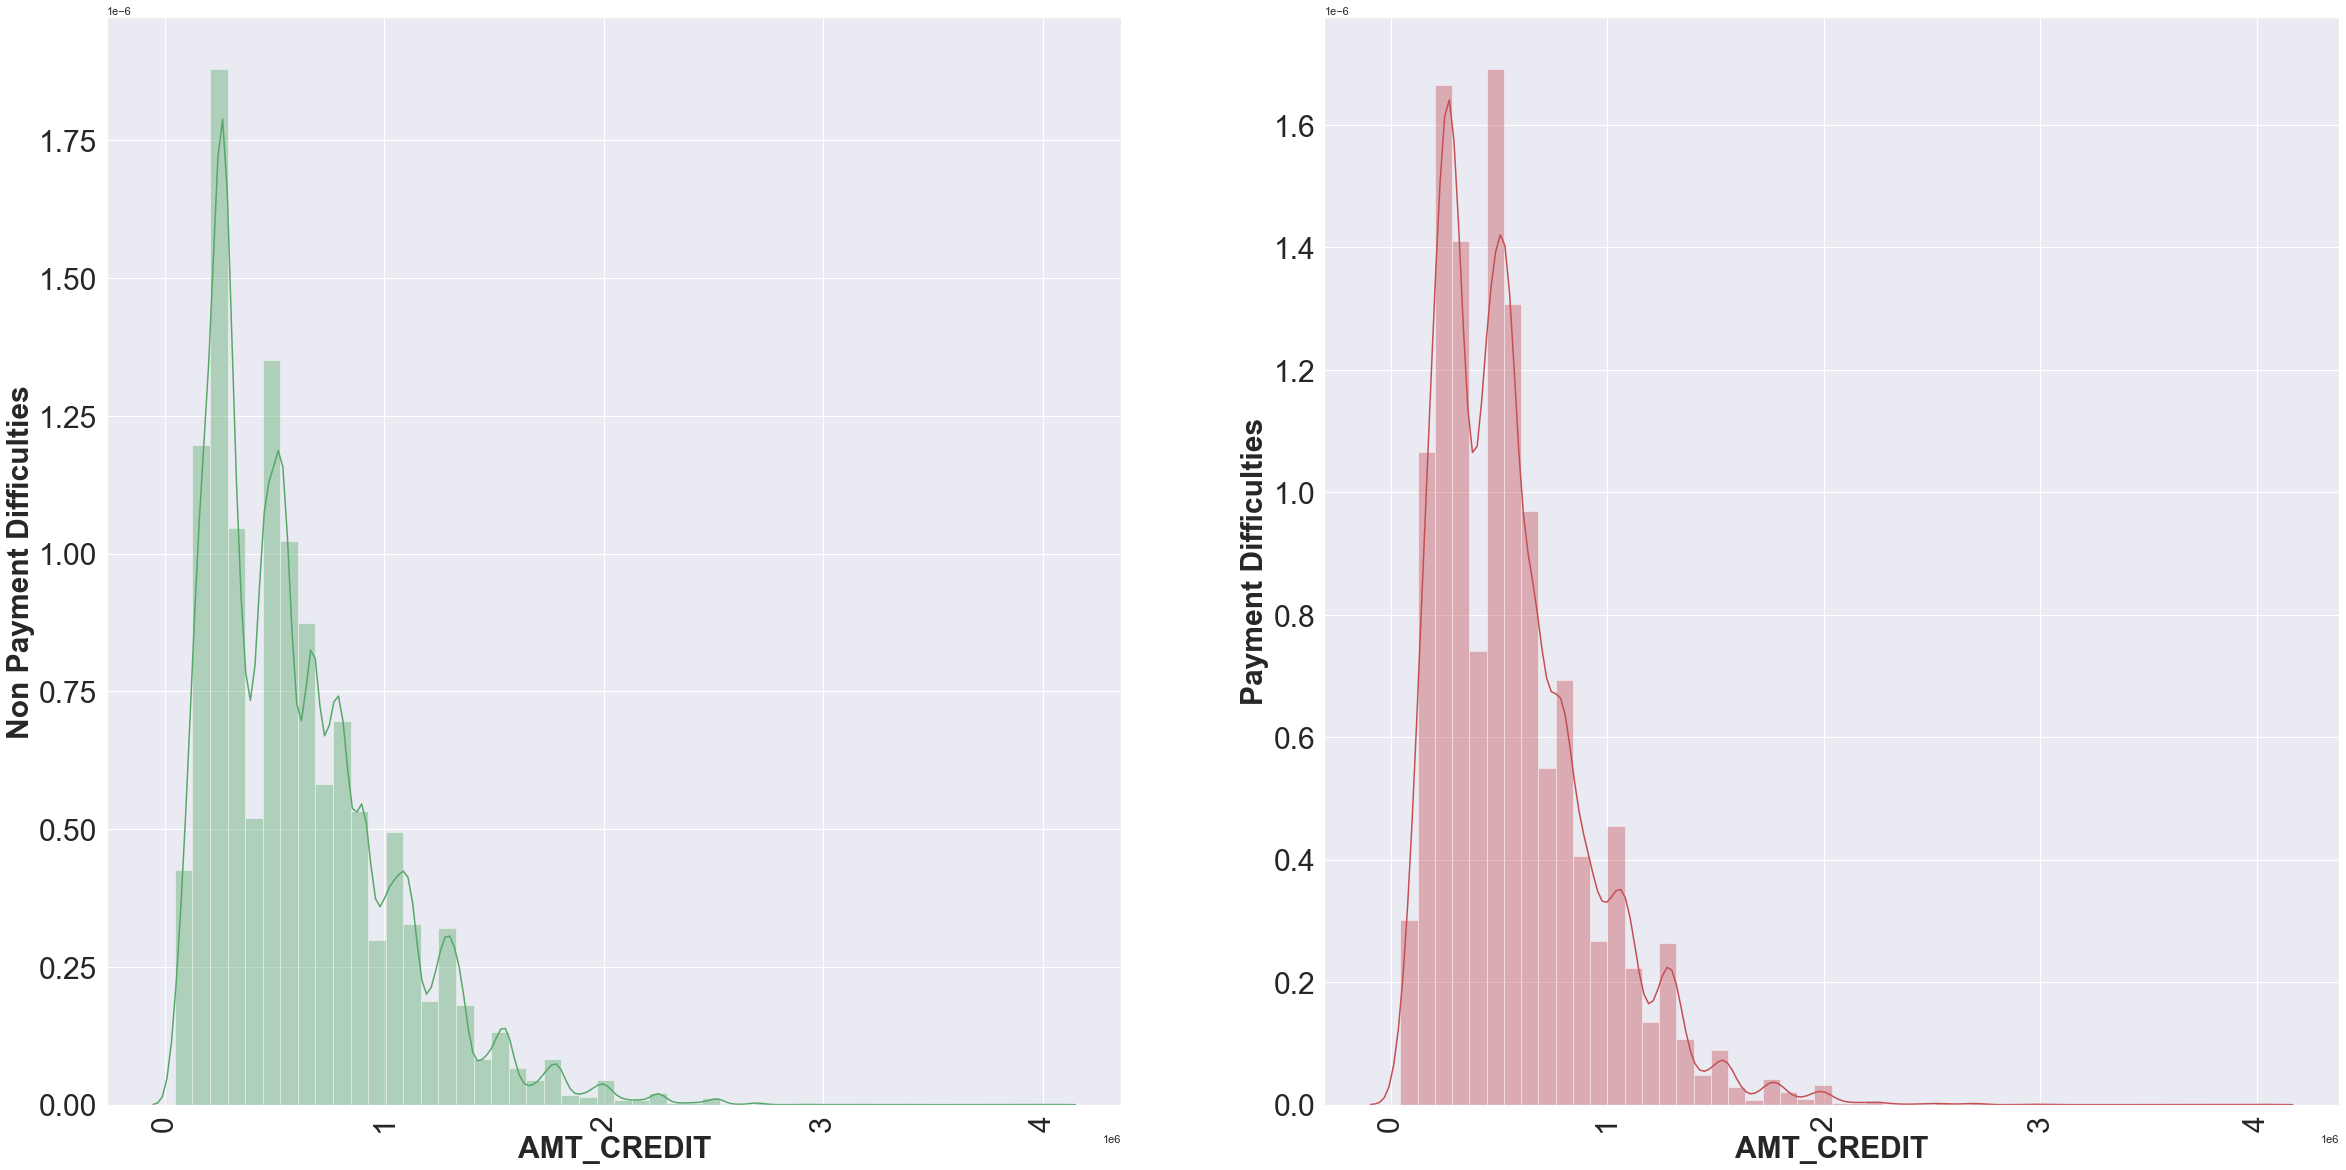

In [142]:
univariate(c='AMT_CREDIT')

Univariate analysis of Price with respect to Target variable

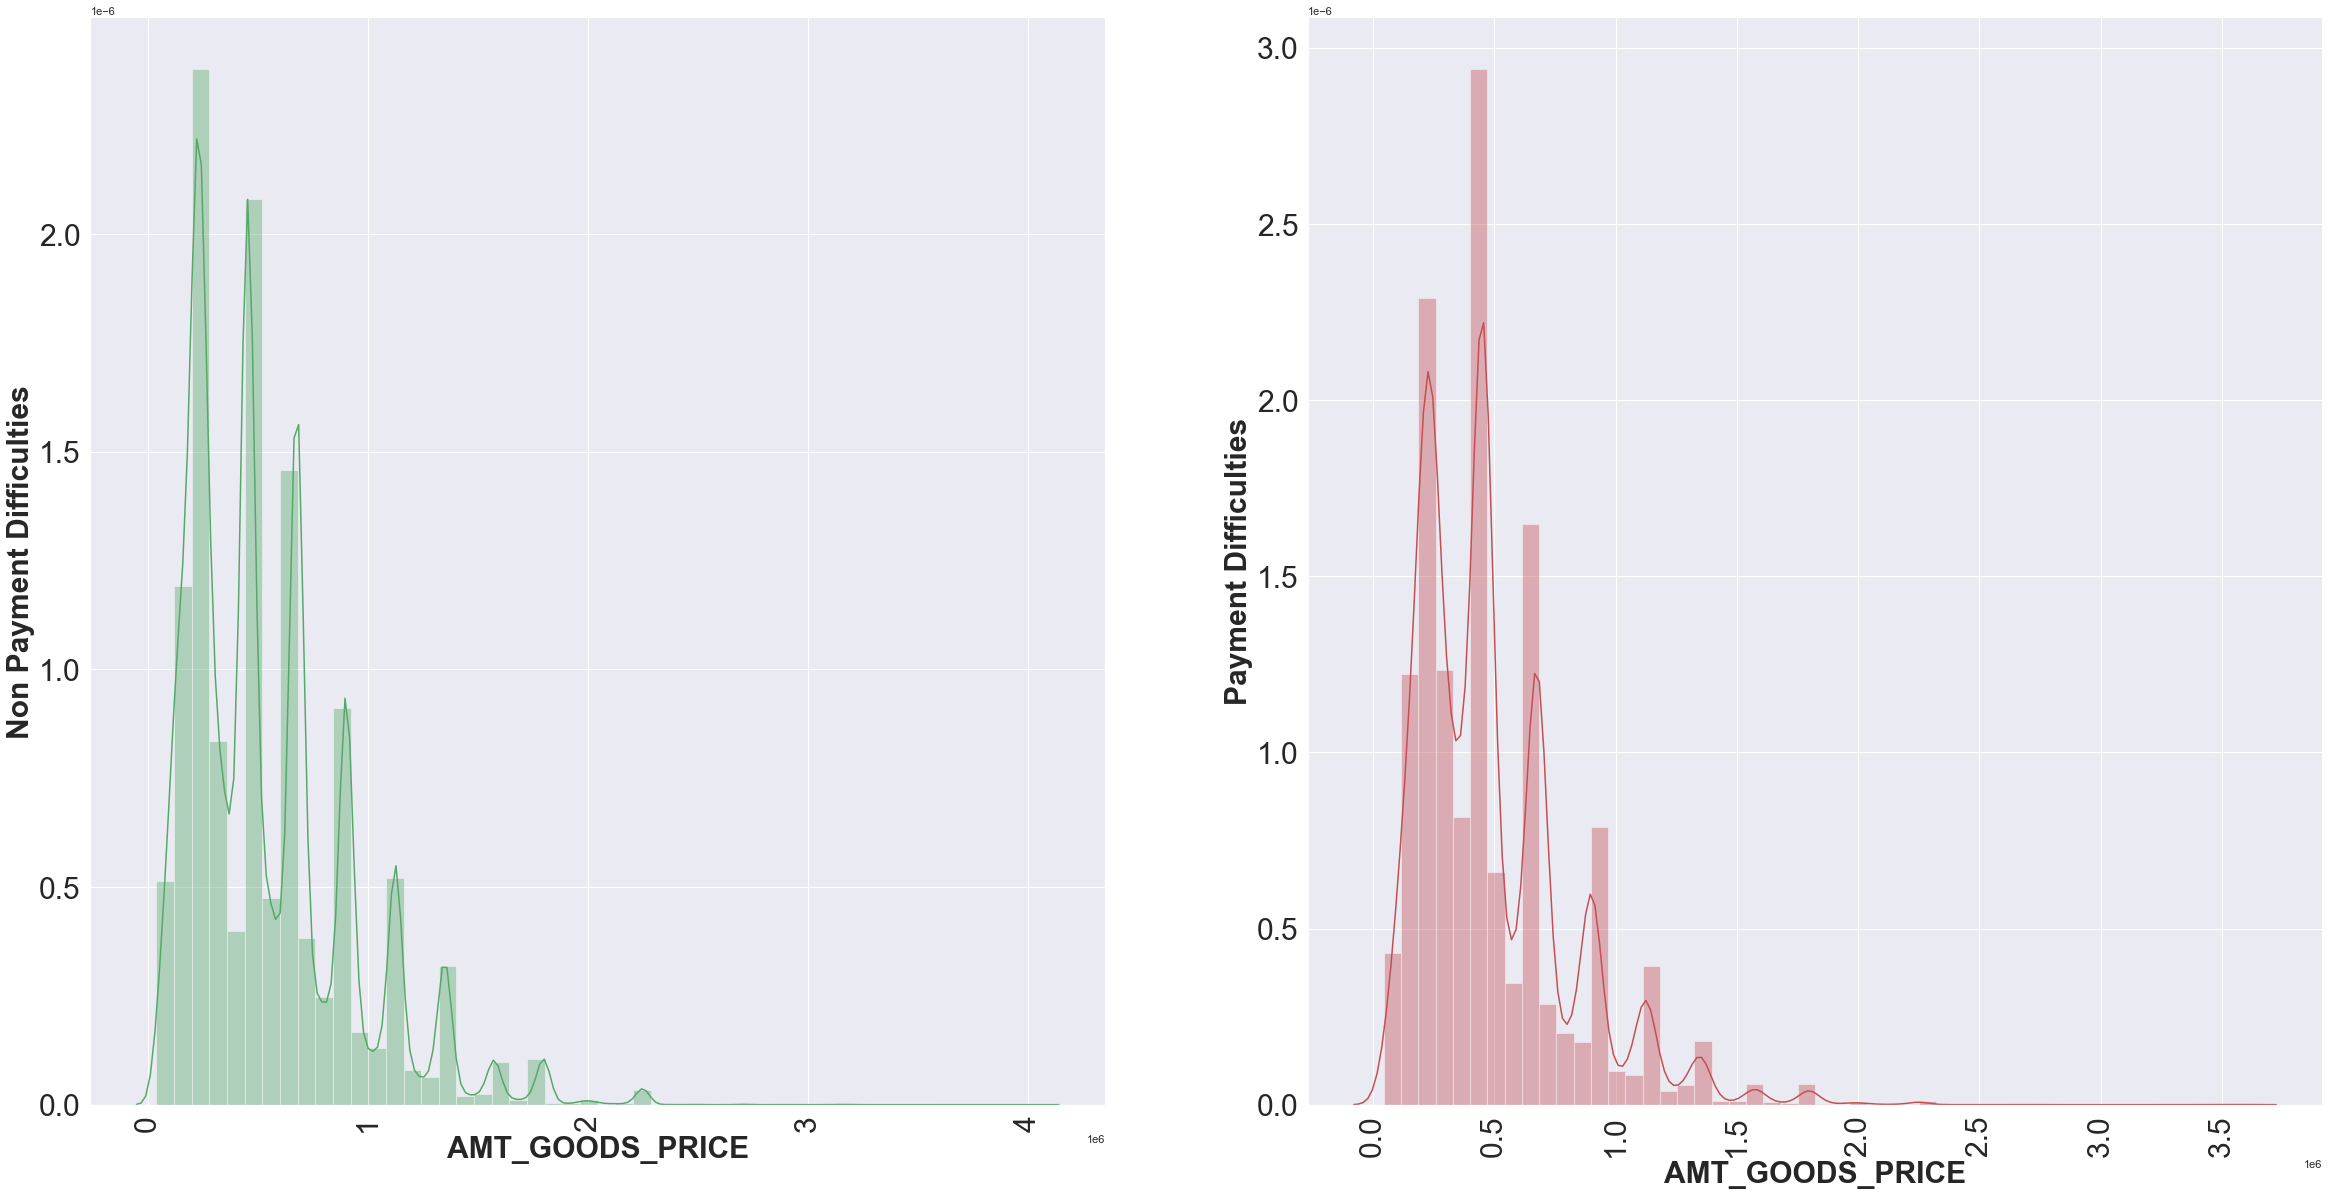

In [143]:
univariate(c='AMT_GOODS_PRICE')

Total amount with respect to Target variable

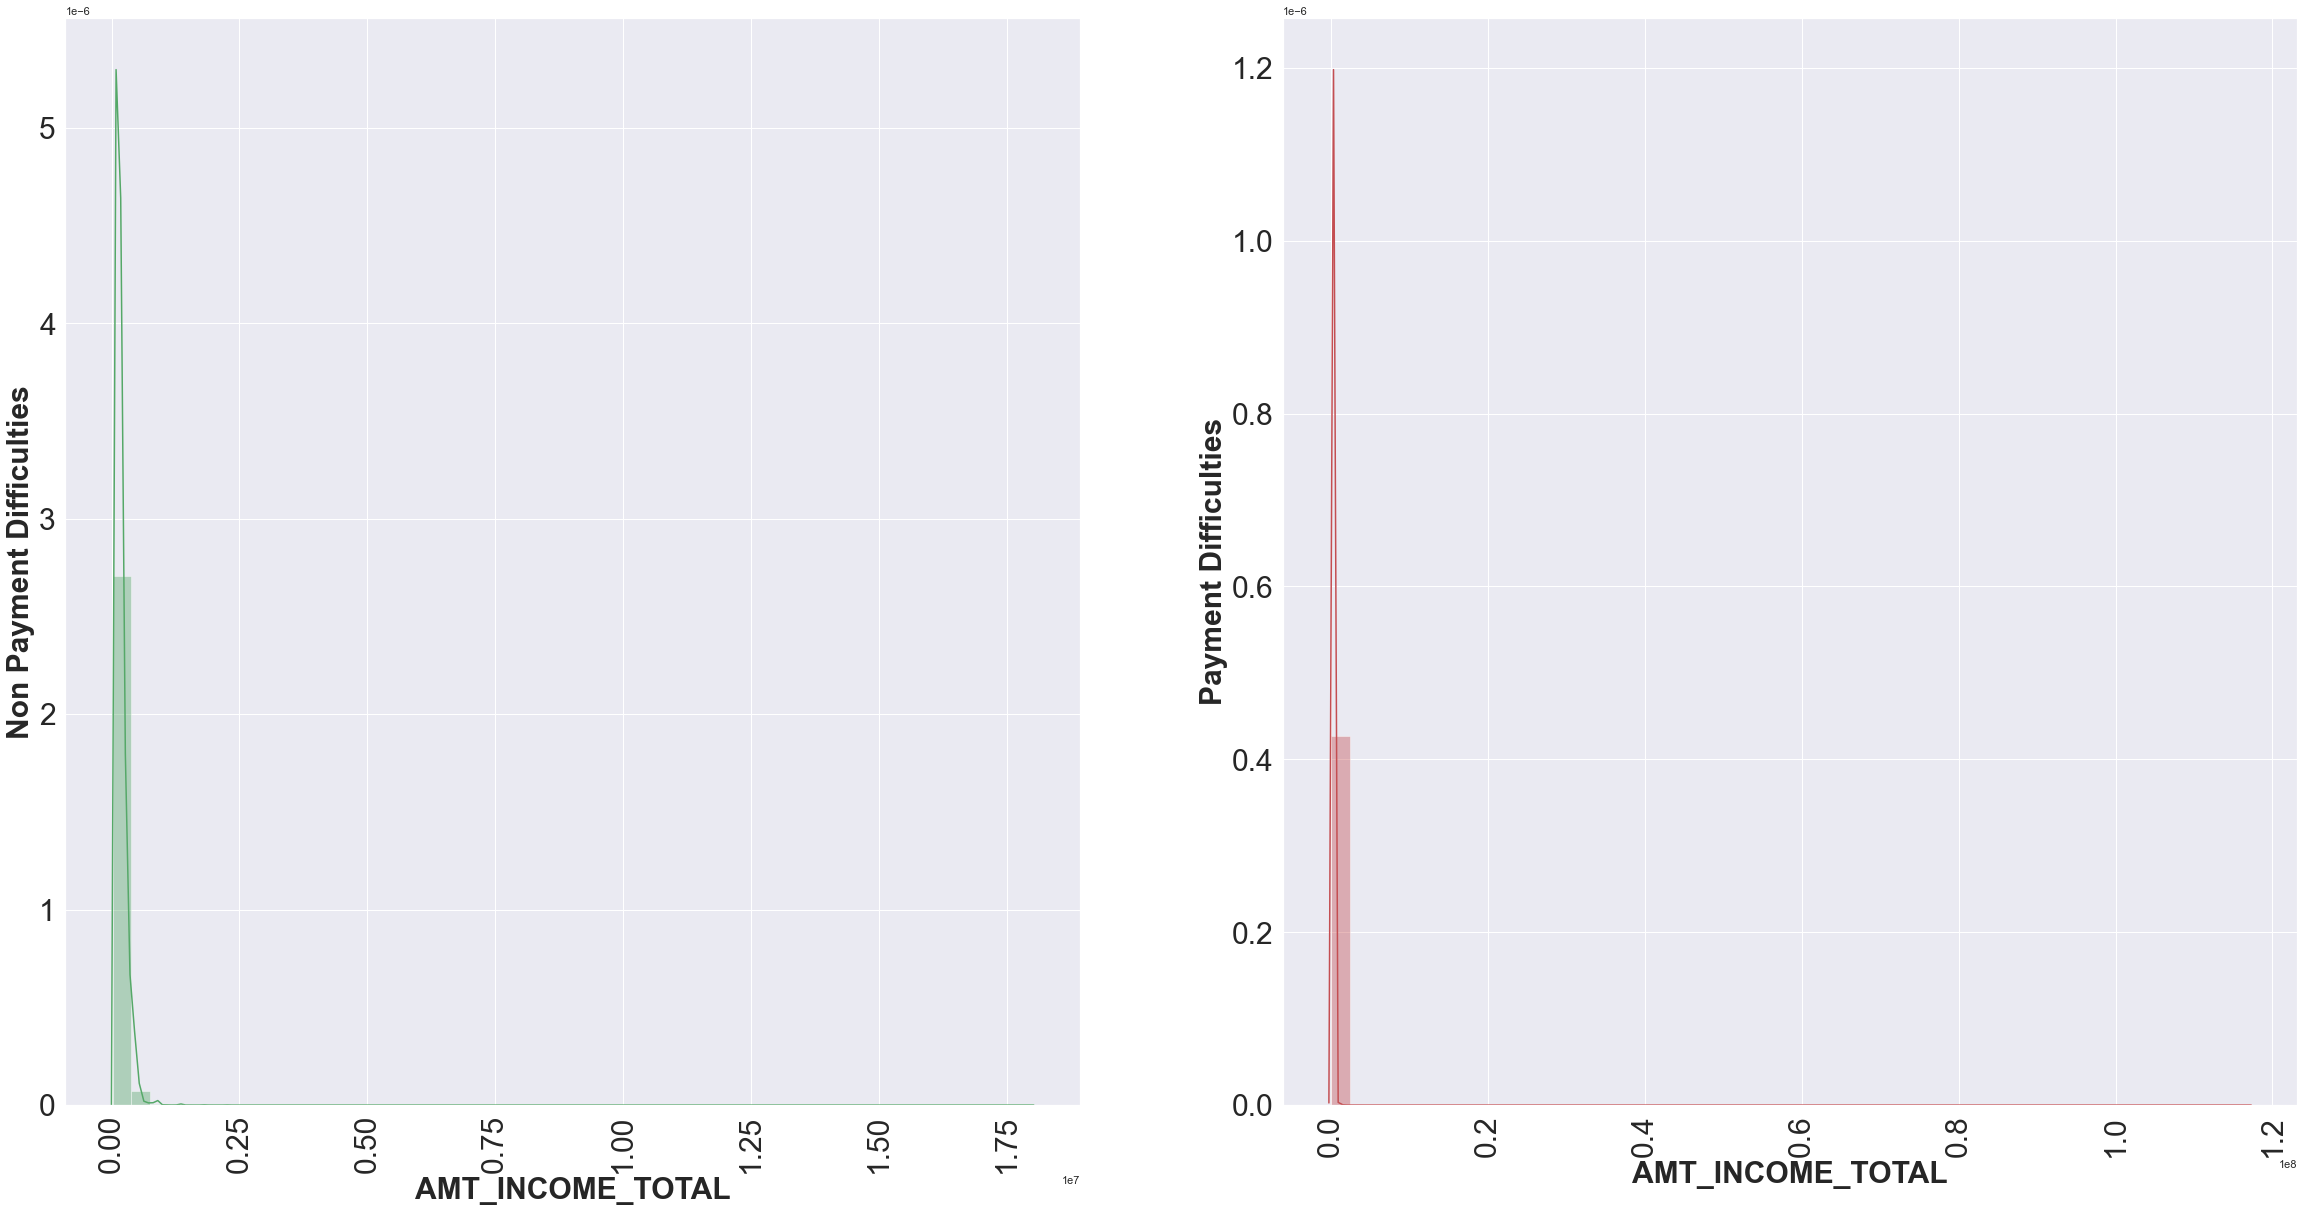

In [144]:
univariate(c='AMT_INCOME_TOTAL')

Observation:
People with target one has largely staggered income as compared to target zero. Dist. plot clearly shows
that the shape in Income total, Annuity
and Good Price is similar for Target 0 and similar for Target 1.

Bivariate analysis with respect to target variable
Analysis with more than one variable is called multivaribale analysis


First of all get the columns which will be used for bivariate analysis

In [145]:
df[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

creating a box plot for income vs academic degree

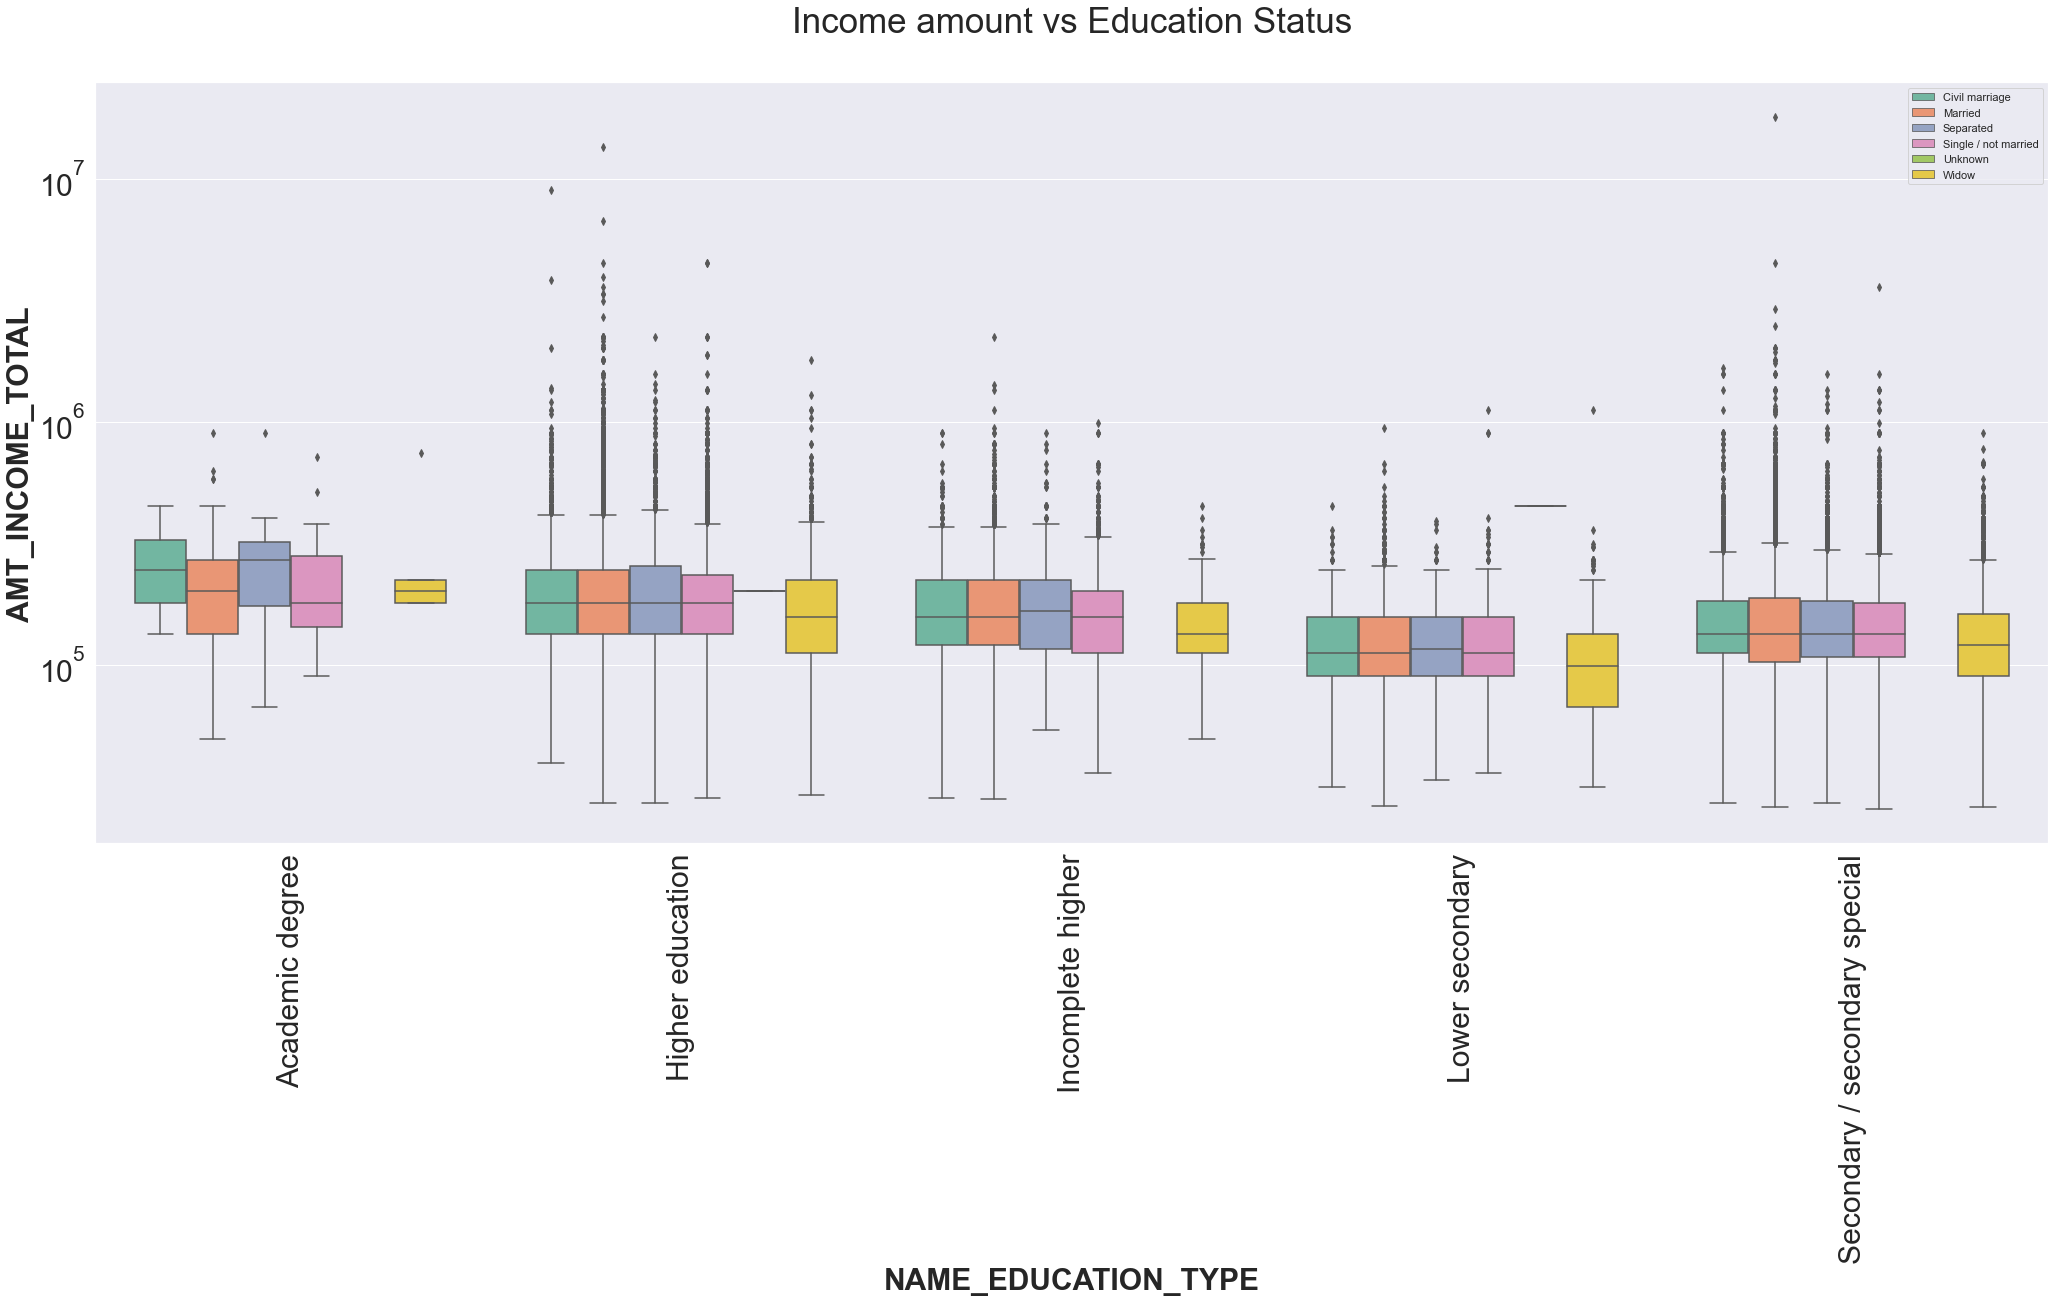

In [146]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target_zero, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Observation:
Clients with different Education types except Academic degrees have a large number of outliers
Most of the population i.e. clients’ credit amounts lie below 25%.
Clients with an Academic degree and who is a widow tend to take higher credit loan.
Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education
and Secondary/Secondary Special Education are more likely to take a high amount of credit loans

creating a box plot for credit vs educational status

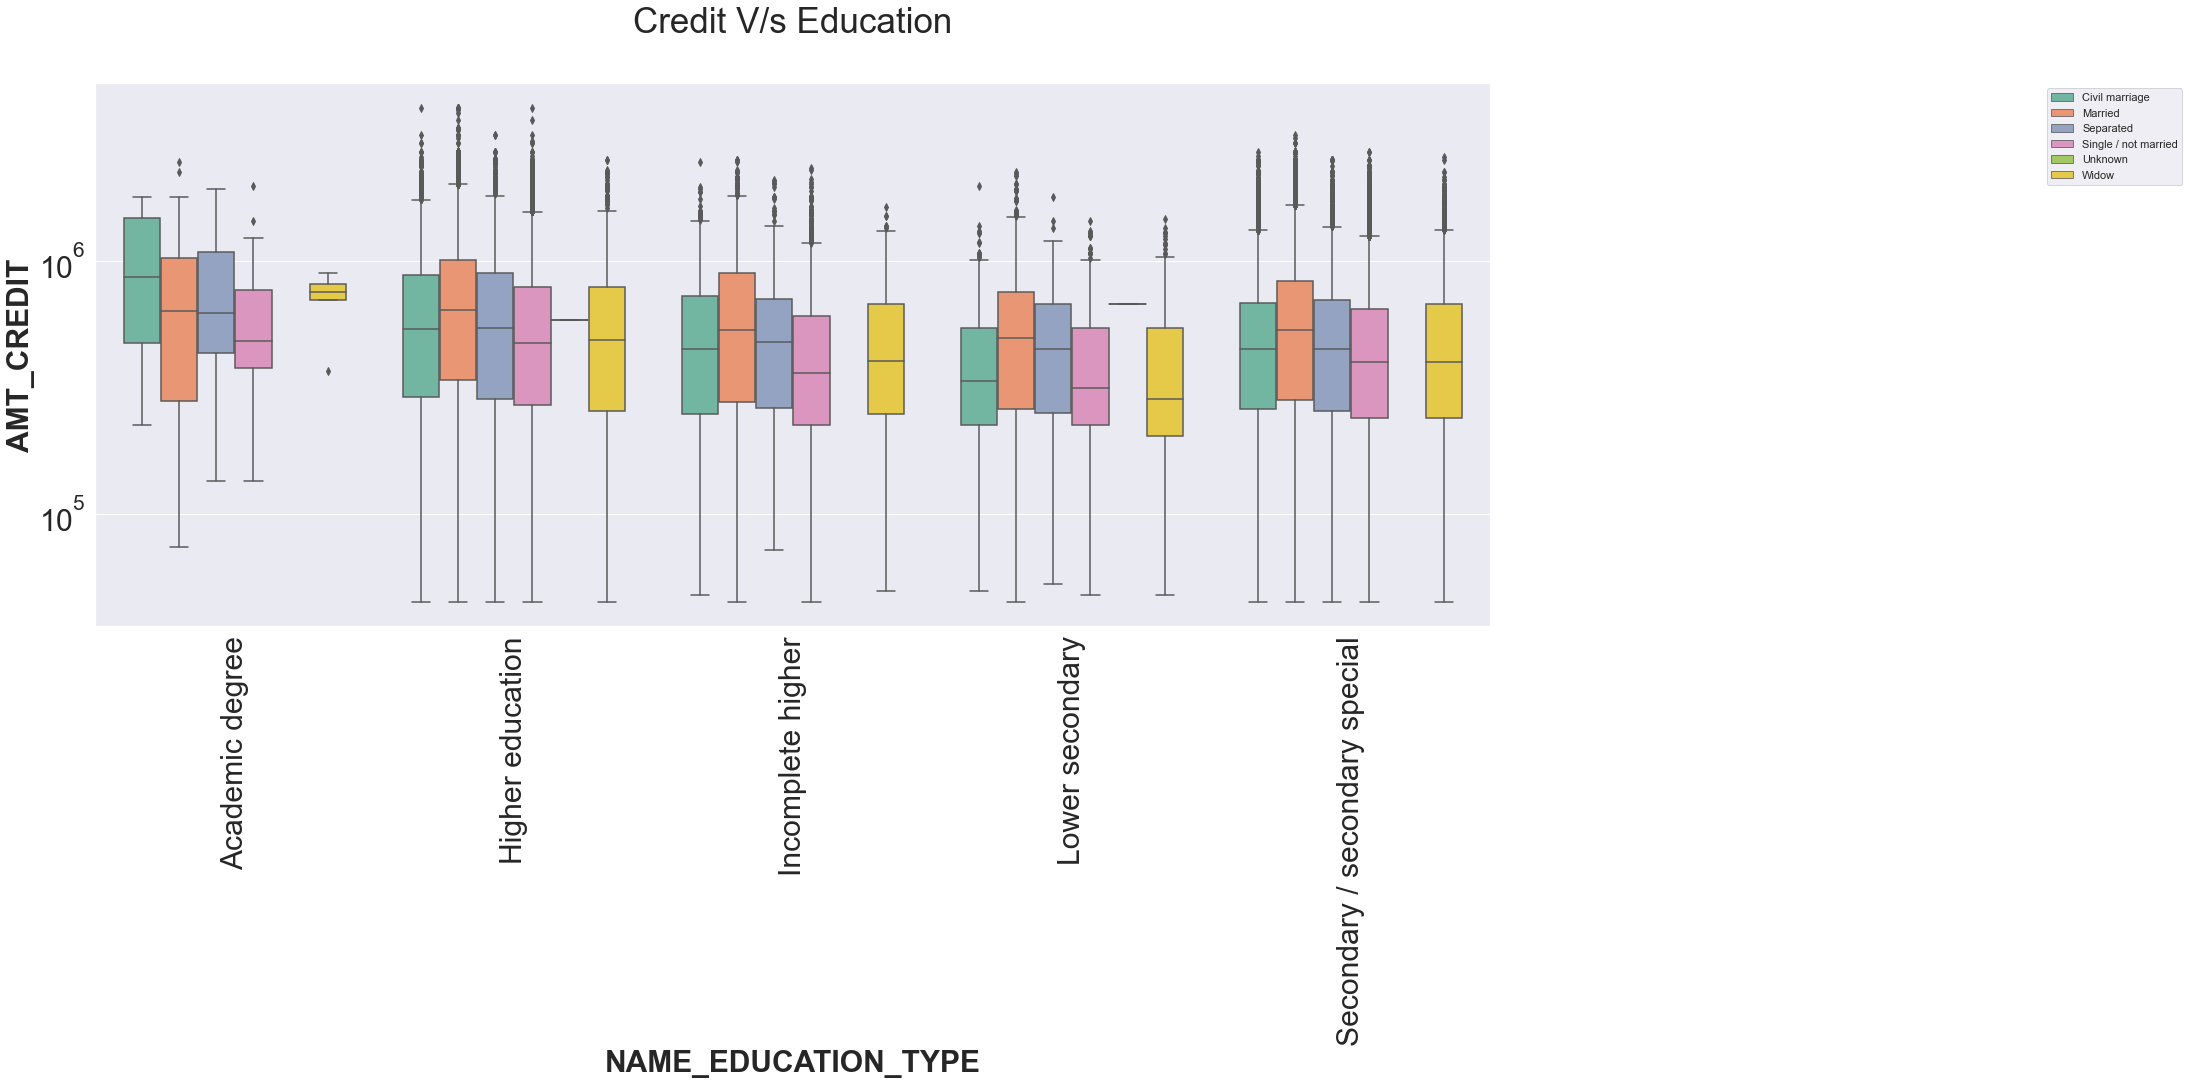

In [147]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target_zero, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Observation:
Clients with different Education types have a large number of outliers
clients credit amounts lie below 25%.
Clients with an Academic degree and who is a widow tend to take higher credit loan.
Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education 
and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.

# Bivariate analysis for Target one

Education ,Family and Income amount for payment difficulty clients

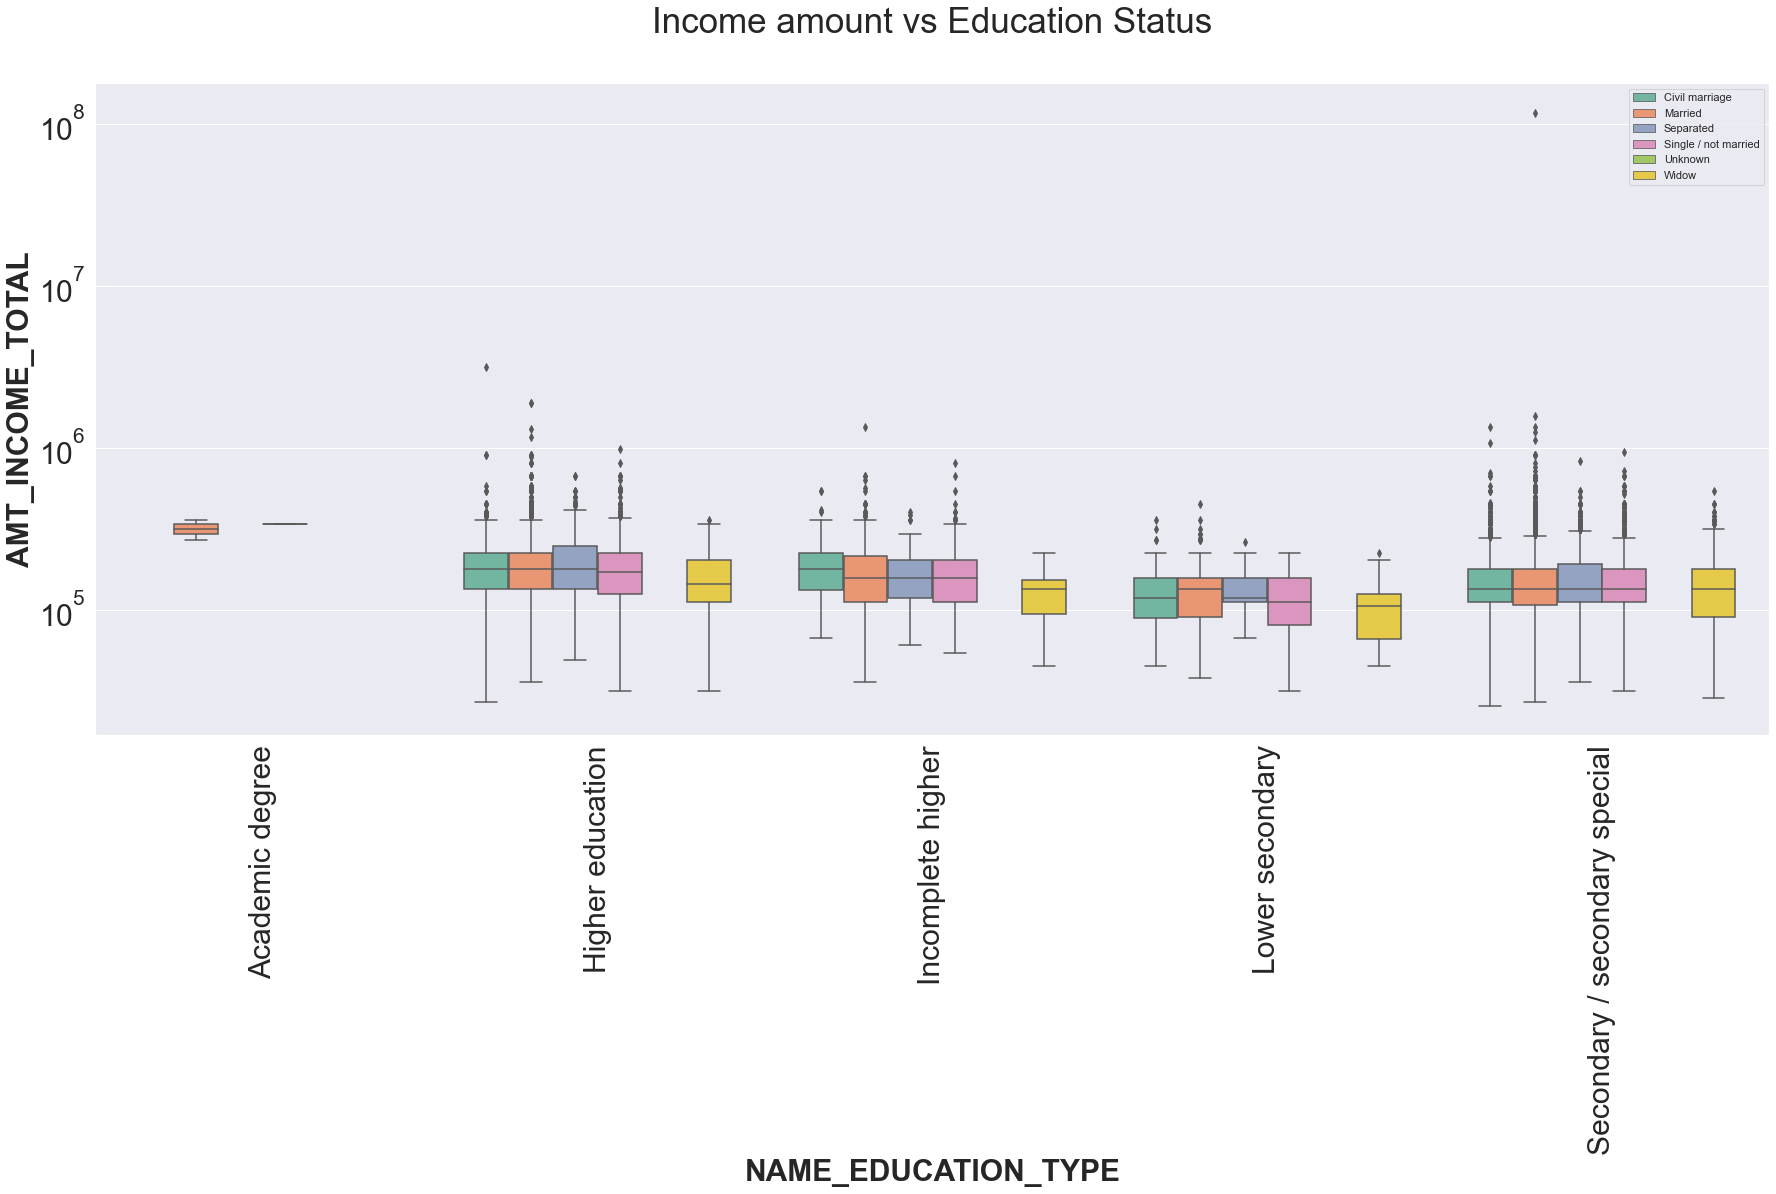

In [148]:

plt.figure(figsize=(30,12)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target_one, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Observation:

The income amount for Married customers with an academic degree is much lesser as compared to others.
(Defaulter) Clients have relatively less income as compared to Non-defaulters.

Bivariate analysis with Education , Family and credit amount 

Bivariate analysis with Education , Family and credit amount

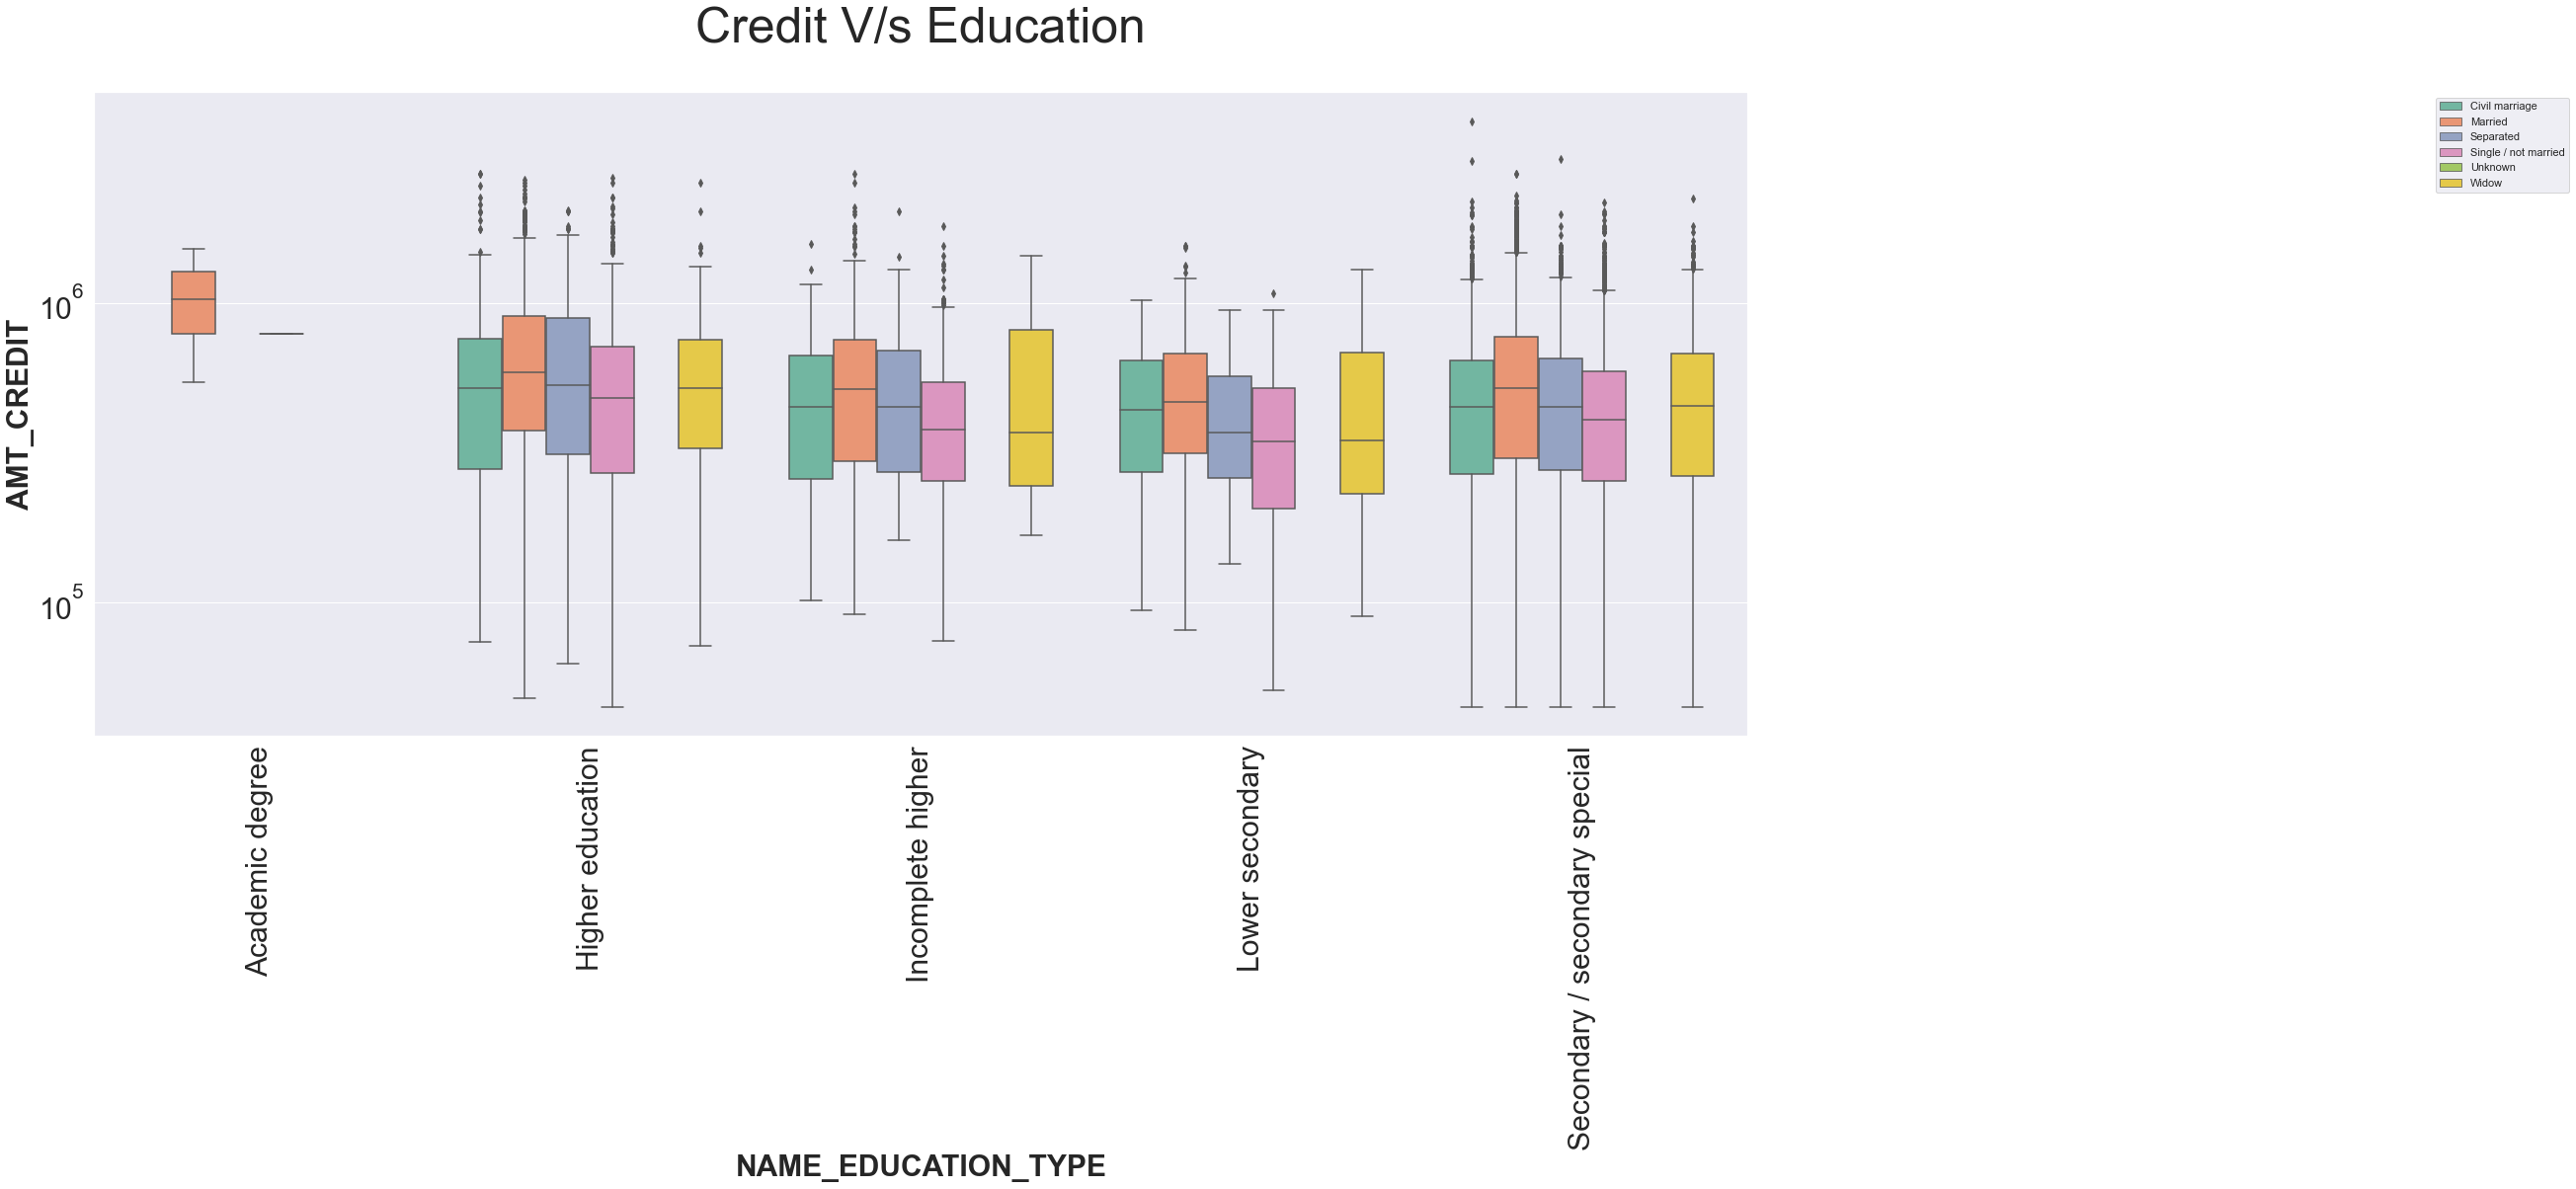

In [149]:
plt.figure(figsize=(30,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.boxplot(data =Target_one, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

# Bivariate Analysis of Categorical-Categorical to Find the Maximum % Clients with Loan-Payment Difficulties

In [155]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
# Calculate the percentage of target=1 per category value    

    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean() 
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()
    

# Distribution of Amount Income Range and the category with maximum % Loan-Payment Difficulty

In [159]:
biplot(df,'AMT_INCOME_TOTAL','Income range')

# Distribution of Type of Income and the category with maximum Loan-Payment Difficulties

In [161]:
biplot(df ,'NAME_INCOME_TYPE','Income type')

Observation:

Though count of working clients applying for loan is significantly high , risk to default in payments is less as compared to others

Count of clients with income type Maternity leave is only 5, but risk to default in payments for those is minimum among all the income types.

Same condition is observed in case of unemployed.Though count is very low,risk to default in payments is low.

Pensioner,State servant and Commercial associate have higher risk to default.

# Distribution of Contract Type and the category with maximum Loan-Payment Difficulties



In [164]:

biplot(df,'NAME_CONTRACT_TYPE','Contract type')

Observation:
Cash loans have higher risk to default, Revolving loans have comparatively lower risk for the same

# Distribution of Education Type and the category with maximum Loan-Payment Difficulties


In [167]:
biplot(df ,'NAME_EDUCATION_TYPE','Education type')

# Observation:
Customers  having Academic Degree and higher Education have less risk to default.

Customers having Lower Secondary , Secondary/Secondary Special Education have very high chance to fail in fulfilling the loan.

In [168]:
7.5 Distribution of Housing Type and the category with maximum Loan-Payment Difficulties
biplot(df1 ,'NAME_HOUSING_TYPE','Housing type')
Insights:
Applicants living in House/Apartments has the highest number of loan application.While we see that Rented apartment and applicants living with parents have very high percentage to default

SyntaxError: invalid syntax (2250240559.py, line 1)

# Distribution of Housing Type and the category with maximum Loan-Payment Difficulties

In [169]:
biplot(df ,'NAME_HOUSING_TYPE','Housing type')

Observation:

Applicants living in House/Apartments has the highest number of loan application.While we see that Rented apartment and applicants living with parents have very high percentage to default

In [177]:
# Distribution of CODE_GENDER with respect to AMT_INCOME_RANGE to find maximum % Loan-Payment Difficulties using pivot table
pv_table= pd.pivot_table(df, values='TARGET', index=['CODE_GENDER','NAME_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

In [178]:
pv_table

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER NAME_INCOME_TYPE                                      
F           Very_low                 0.000000          0.056068   
            Low                      0.000000          0.049022   
            Medium                   0.000000          0.050254   
            High                     0.105263          0.041516   
            Very_High                0.076923          0.037289   
M           Very_low                 0.000000          0.080411   
            Low                      0.000000          0.073305   
            Medium                   0.000000          0.070086   
            High                     0.000000          0.055911   
            Very_High                0.000000          0.044080   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER NAME_INCOME_TYPE                                       
F           Very_low                   0.086399         0.080193   
            Low                        0.080075         0.113889   
            Medium                     0.078431         0.096983   
            High                       0.074313         0.038961   
            Very_High                  0.082251         0.066667   
M           Very_low                   0.123967         0.125000   
            Low                        0.097778         0.142857   
            Medium                     0.095130         0.150515   
            High                       0.074627         0.081633   
            Very_High                  0.077586         0.064516   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER NAME_INCOME_TYPE                                 
F           Very_low                               0.076778  
            Low                                    0.079523  
            Medium                                 0.075692  
            High                                   0.070736  
            Very_High                              0.065930  
M           Very_low                               0.118066  
            Low                                    0.123693  
            Medium                                 0.113466  
            High                                   0.093484  
            Very_High                              0.089939

Observaion:
Female clients with Academic degree and high income type have high risk to default

Male clients with Secondary Education having all types of salaries have high risk to default.

Male customers with Incomplete Education having very low salary have high risk to default.

Male Customers with Lower Secondary Education having very low or medium have high risk to default

In [ ]:
 Pairplot for Target 0 (Loan-Non Payment Difficulties)



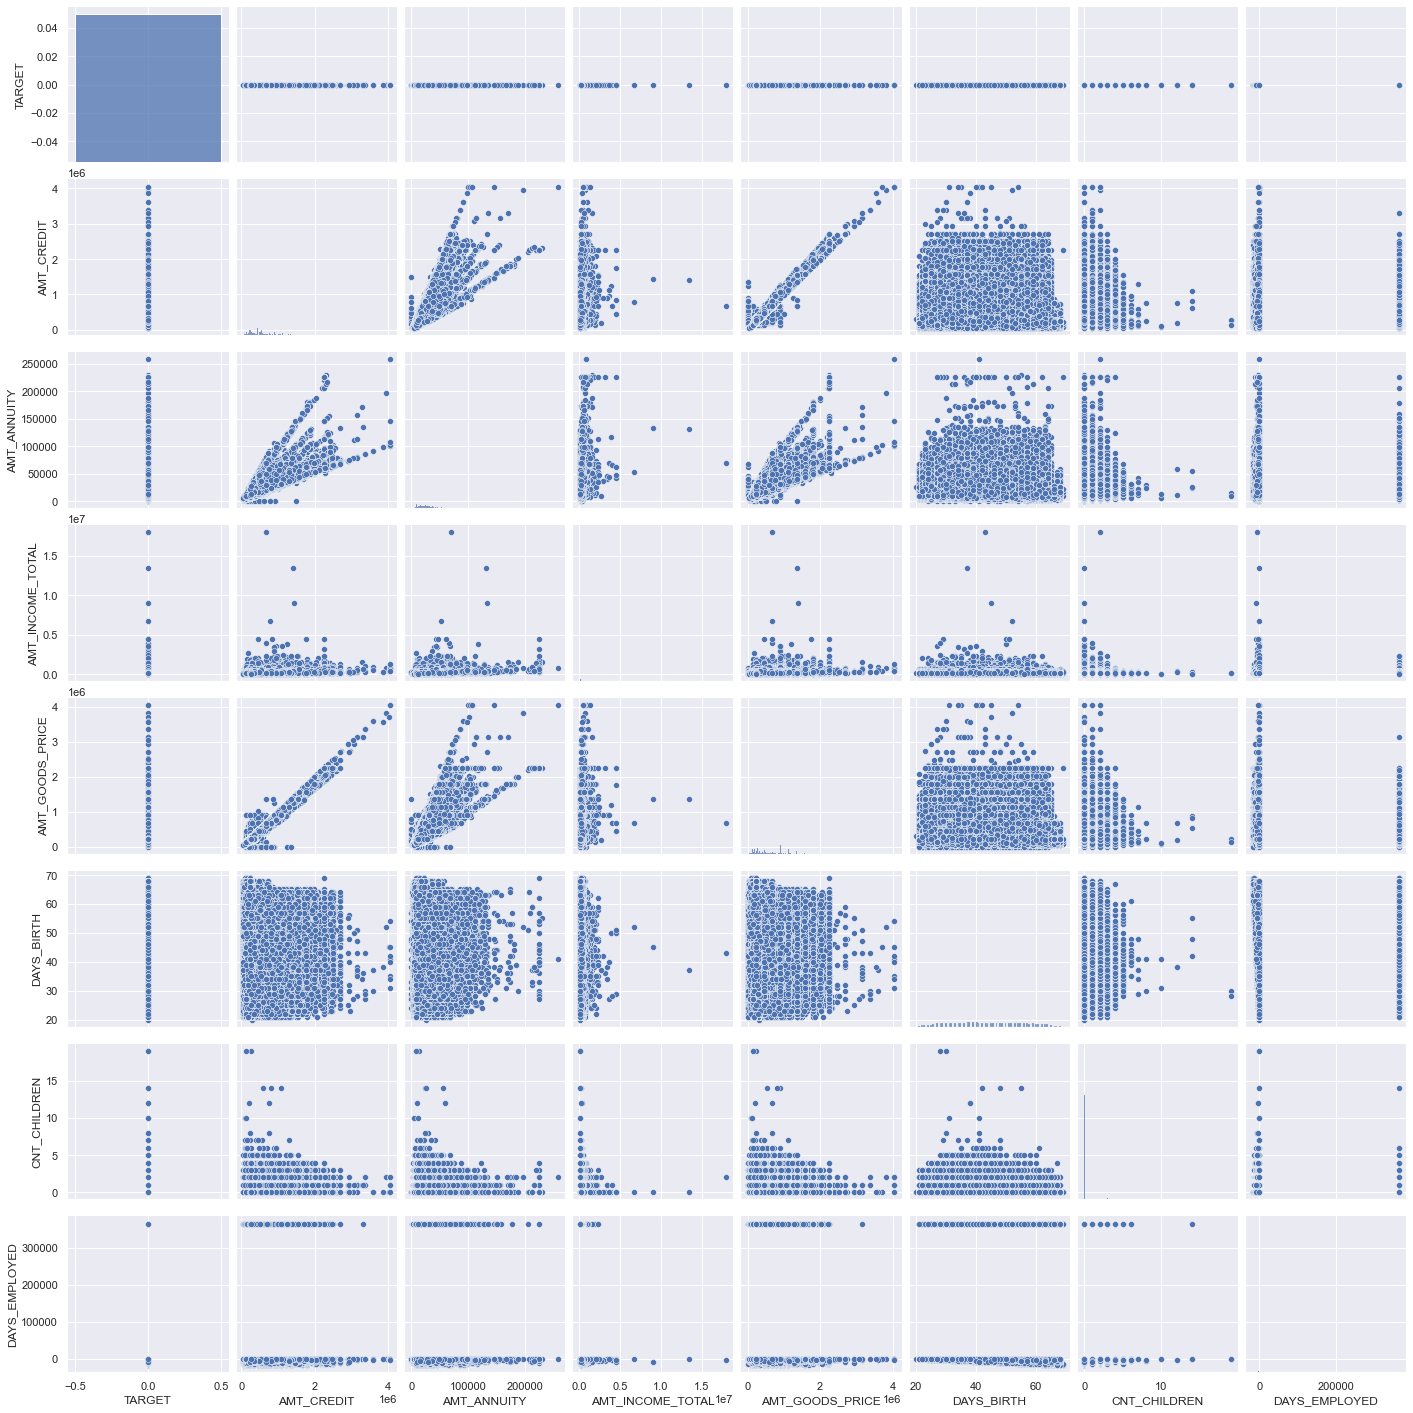

In [181]:
pairplot = Target_zero[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pairplot)

plt.show()

Pairplot for Target 1 (Loan-Payment Difficulties)



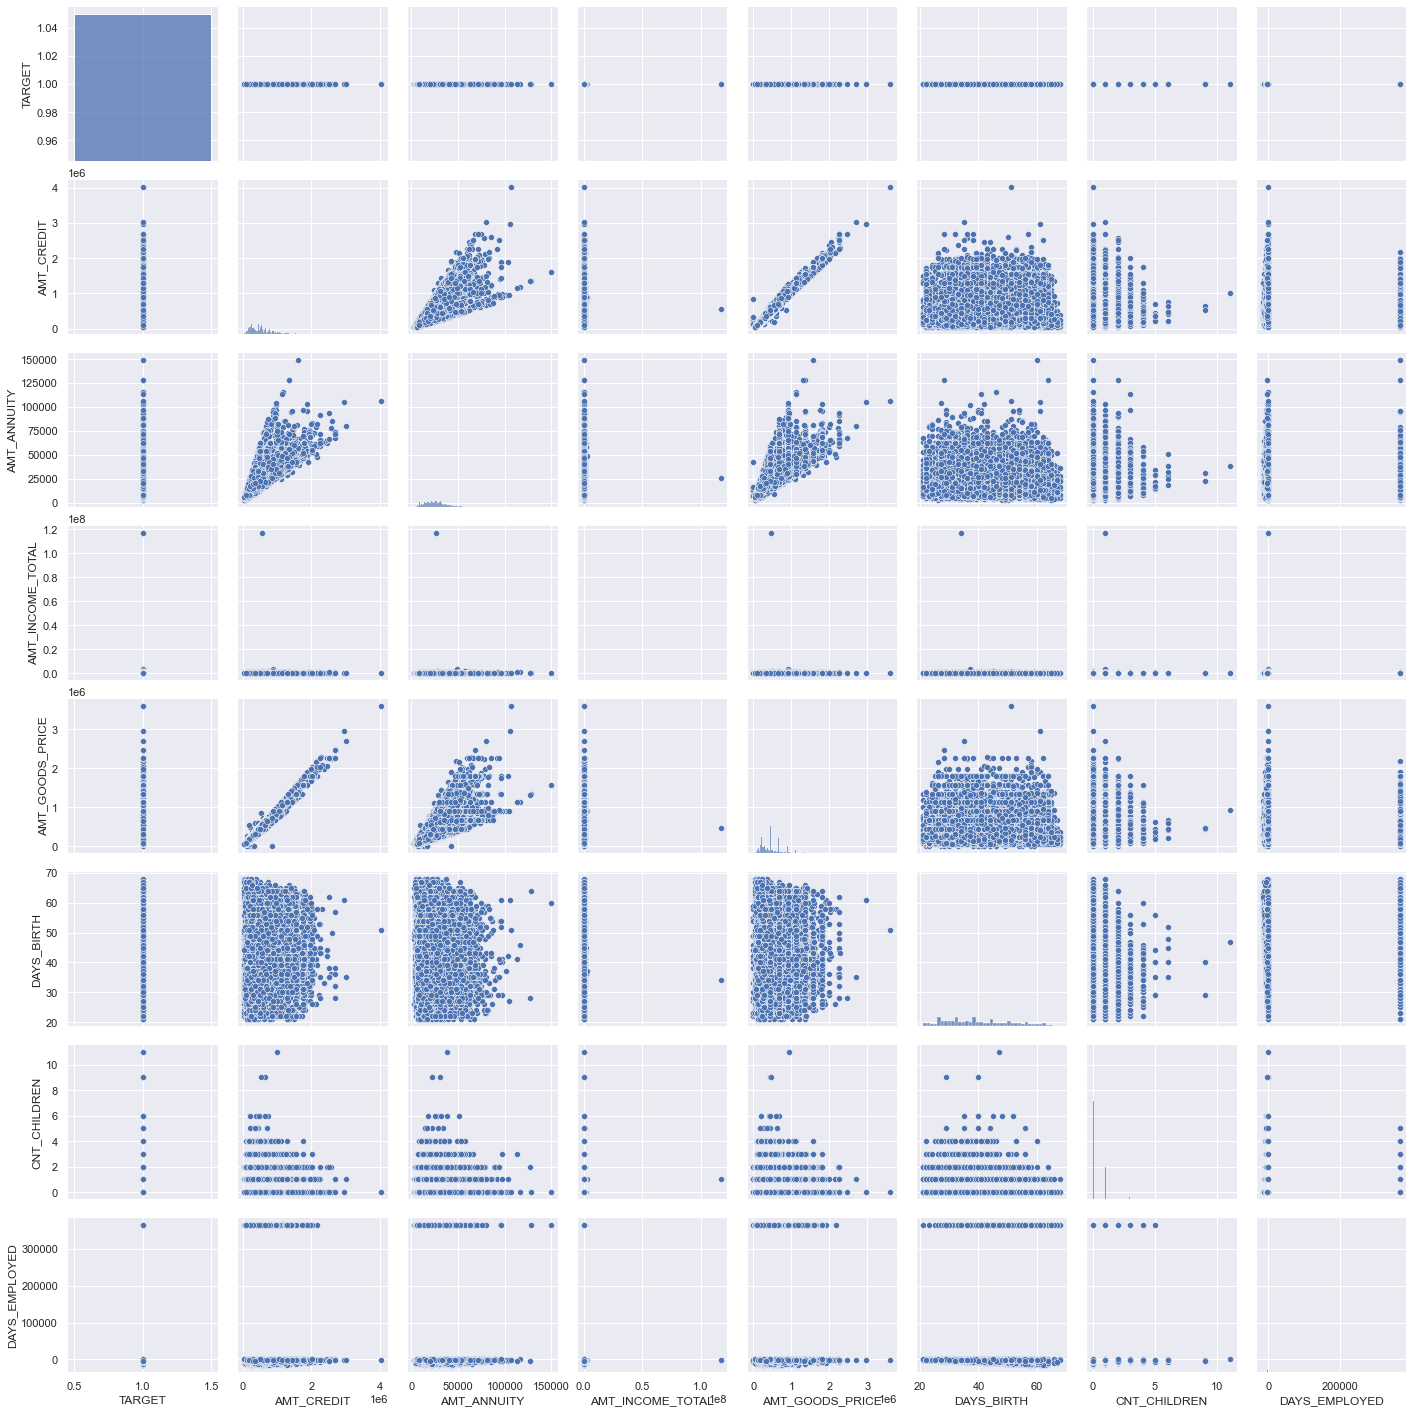

In [182]:
pairplot = Target_one[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pairplot)

plt.show()

# Observaion:

AMT_CREDIT and AMT_GOODS_PRICE are highly correlating variables for both defaulters and non - defaulters. 

Same is the case with AMT_CREDIT and AMT_ANNUITY (EMI).They are highly correlated variables for both cases .

All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

# Correlations between numerical variables using "Heatmap's"



# TARGET ZERO

In [187]:
correlations0=df.iloc[0:,2:]
correlations1=df.iloc[0:,2:]

t0=correlations0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=correlations1.corr(method='spearman')

In [188]:
def both_target_corr(data,title):
    plt.figure(figsize=(15, 10))
    
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='RdYlGn') 

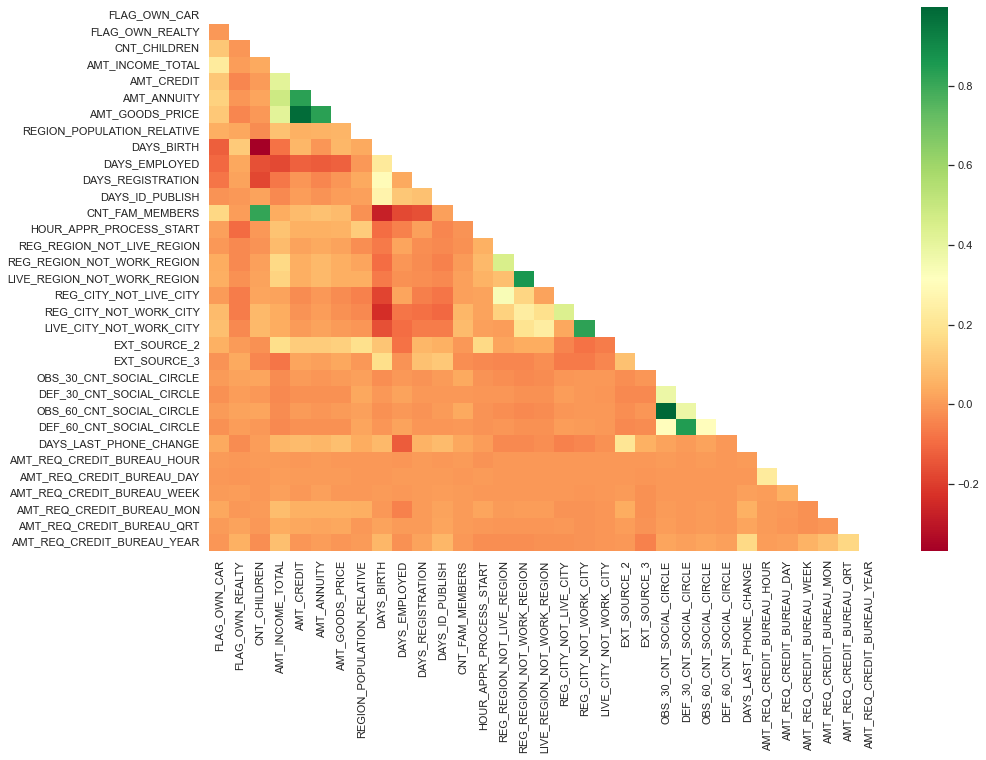

In [189]:
both_target_corr(data=t0,title='Correlation for Target zero')

In [ ]:
Observation:
people belongs to low-age group taking high Credit amount and vice-versa

Credit amount is higher for less children count client have and vice-versa.

more income for less children client have and vice-versa.

less children client have in densely populated area.

AMT_CREDIT is higher to densely populated area.

AMT_INCOME_TOTAL is also higher in densely populated area.

# TARGET ONE

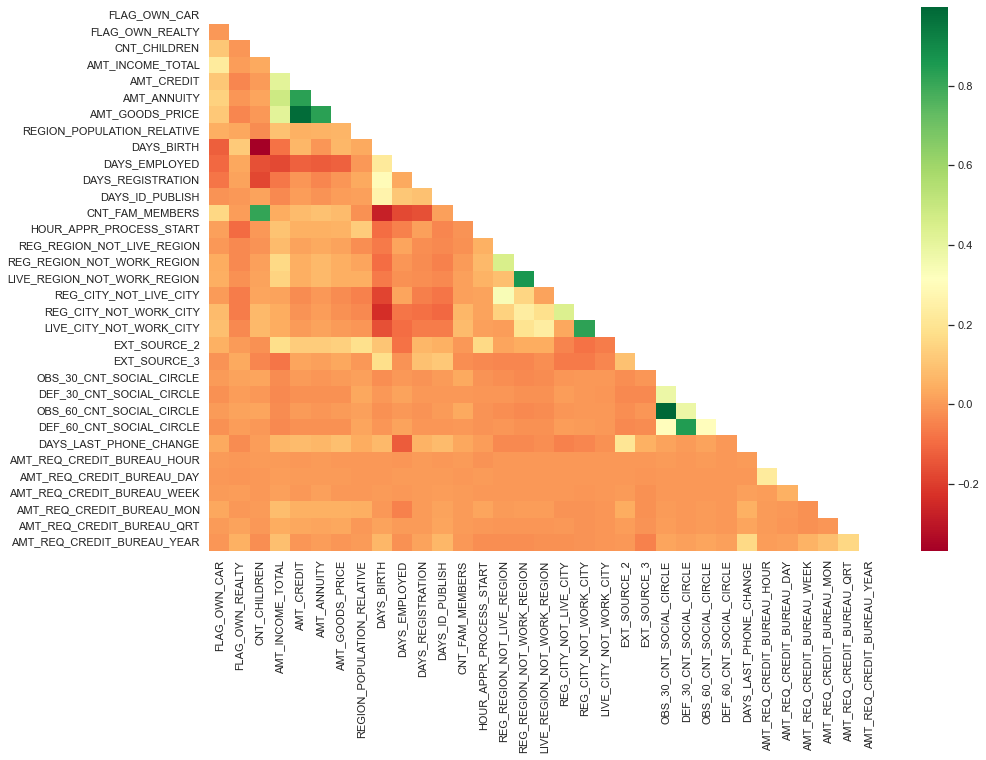

In [190]:
both_target_corr(data=t1,title='Correlation for Target one')

Observation:
Target One and zero have almost similar observation.But they differ in few points:

The client's permanent address does not match contact address are having less children.

The client's permanent address does not match work address are having less children.

# Top 10 Correlations for TARGET 0 and TARGET 1

In [192]:
Columns_zero=Target_zero.columns  #Collecting all Columns of Target0 

corr=Target_zero[Columns_zero].corr(method = 'pearson')                        # Finding correlations using corr() func.

corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0=corr.unstack().reset_index() 

In [193]:
top10_corr0.columns = ['VAR1','VAR2','CORRELATION']  # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)

top10_corr0['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998510   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859371   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686   
251                  AMT_ANNUITY                  AMT_CREDIT     0.771309   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.617967   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101   

     CORR_ABS  
934  0.998510  
286  0.987250  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776686  
251  0.771309  
395  0.617967  
611  0.446101

# TARGET 1

In [196]:

columns_one=Target_one.columns   #Collecting all Columns of Target0 

corr1=Target_one[columns_one].corr(method = 'pearson')
corr1=corr1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))             # Finding correlations using corr() func


top10_corr1=corr1.unstack().reset_index()   # Top 10 Correlations 

In [197]:
top10_corr1.columns = ['VAR1','VAR2','CORRELATION']     # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr1.dropna(subset=['CORRELATION'],inplace=True)

top10_corr1['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr1.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998270   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.869016   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699   
251                  AMT_ANNUITY                  AMT_CREDIT     0.752195   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.575362   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937   

     CORR_ABS  
934  0.998510  
286  0.987250  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776686  
251  0.771309  
395  0.617967  
611  0.446101

# Loading Data "previous_application.csv"

In [198]:
df2=pd.read_csv("previous_application.csv")

In [200]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [202]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [203]:
df2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [206]:
(df2.isnull().sum()/len(df2)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

# DATA CLEANING

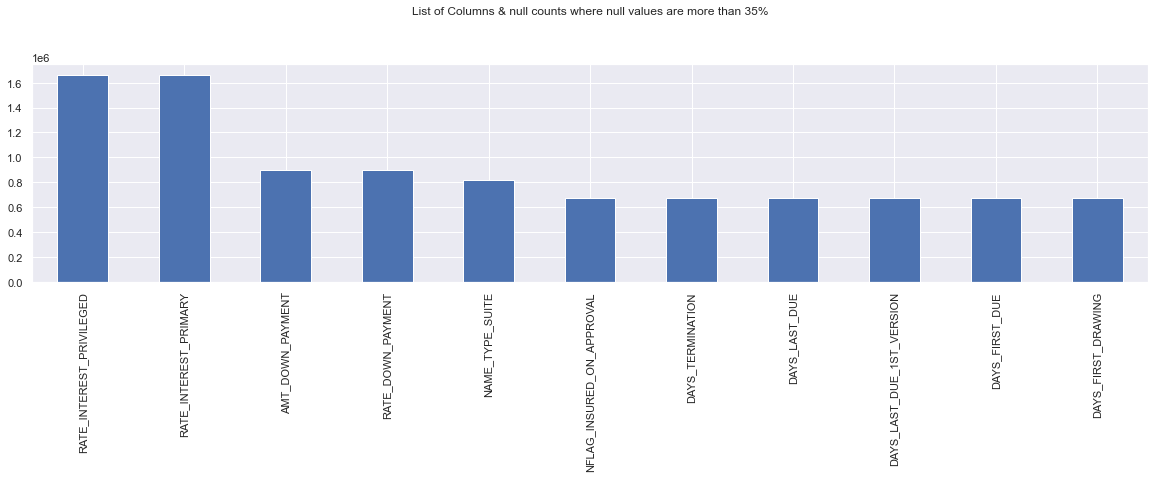

In [208]:
null_col = df2.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df2))]

plt.figure(figsize=(20,4))
null_col.plot(kind='bar')
plt.title('List of Columns & null counts where null values are more than 35%')
plt.show()

In [209]:
len(null_col)

11

In [215]:
remove1=list(null_col.index.values)

In [216]:
df2.drop(labels = remove1,axis=1,inplace = True)

In [221]:
df2.shape


(1670214, 26)

# Replacing missing values

In [219]:
df2.AMT_GOODS_PRICE.fillna(df2.AMT_GOODS_PRICE.median(),inplace = True)

df2.AMT_ANNUITY.fillna(df2.AMT_ANNUITY.mode()[0],inplace = True)

df2.CNT_PAYMENT.fillna(df2.CNT_PAYMENT.mode()[0],inplace = True)

In [220]:
(df2.isnull().sum()/len(df2)*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


# Now handling errors like XNA and XAP

In [222]:
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)



In [223]:
df2.shape

(69635, 26)

In [225]:
updated=pd.merge(left=df,right=df2,how='inner',on='SK_ID_CURR',suffixes='_x')

In [226]:
updated.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER  FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M             0   
1      100035       0          Cash loans           F             0   
2      100039       0          Cash loans           M             1   
3      100046       0     Revolving loans           M             1   
4      100046       0     Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0                1             0           90000.0     180000.0        9000.0   
1                1             0          292500.0     665892.0       24592.5   
2                0             1          360000.0     733315.5       39069.0   
3                1             0          180000.0     540000.0       27000.0   
4                1             0          180000.0     540000.0       27000.0   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0          180000.0   Unaccompanied         Very_low   
1          477000.0   Unaccompanied             High   
2          679500.0   Unaccompanied        Very_High   
3          540000.0   Unaccompanied           Medium   
4          540000.0   Unaccompanied           Medium   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755          28          -1010             4799.0   
1                    0.025164          41          -2668             5266.0   
2                    0.015221          32          -2060             3557.0   
3                    0.025164          44          -1761             8236.0   
4                    0.025164          44          -1761             8236.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3015        Laborers              1.0   
1             3787             NaN              2.0   
2             3557         Drivers              3.0   
3             4292        Managers              2.0   
4             4292        Managers              2.0   

  WEEKDAY_APPR_PROCESS_START_  HOUR_APPR_PROCESS_START_  \
0                     TUESDAY                        16   
1                   WEDNESDAY                        13   
2                    THURSDAY                        10   
3                     TUESDAY                         8   
4                     TUESDAY                         8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       1   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0  Business Entity Type 3   
2                       1                        0           Self-employed   
3                       0                        0  Business Entity Type 3   
4                     

# Rename the columns

In [228]:
updated = updated.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

# Loan Distributions and Purposes

In [233]:

# Percentage Count of NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),
                   specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = updated['NAME_CLIENT_TYPE'].value_counts().index.to_list(),
                     values = updated['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)

fig.add_trace(go.Pie(labels = updated['NAME_CONTRACT_STATUS'].value_counts().index.to_list(), 
                     values = updated['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)


fig.update_traces(hole=.4,showlegend=False)      # Use `hole` to create a donut-like pie chart

fig.show()

Observation:

NAME_CLIENT_TYPE

Around 80.7% clients were applying for loan or were applying again and again.
14.5% clients were new applicantsfor the loan.

percentage of name constract_status

Approved :- 38.8%
Refused :- 58.5%
Canceled :- 2.3%
Unused offer :- 0.31%

# NAME_CONTRACT_STATUS with NAME_CASH_LOAN_PURPOSE  logarithmic scale

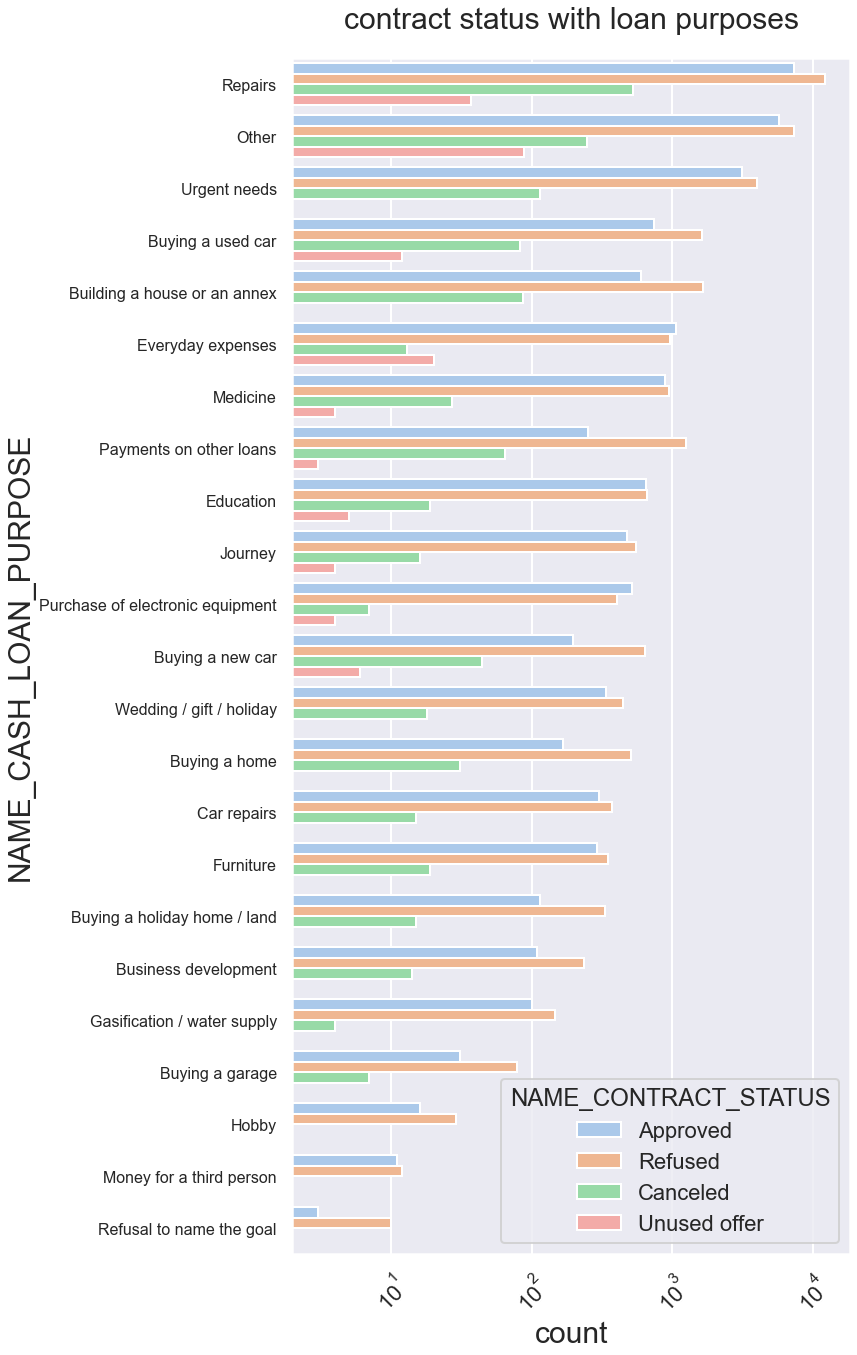

In [236]:

sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('contract status with loan purposes')



ax = sns.countplot(data = updated, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=updated['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

# Observation:
Most rejection are from purpose "Repairs".

For "Education" & "Medicine" we have equal number of approves and rejections for the loan

"Payign other loans" and "Buying a new car' rejection is higher for these groups.

# TARGET with NAME_CASH_LOAN_PURPOSE  logarithmic scale

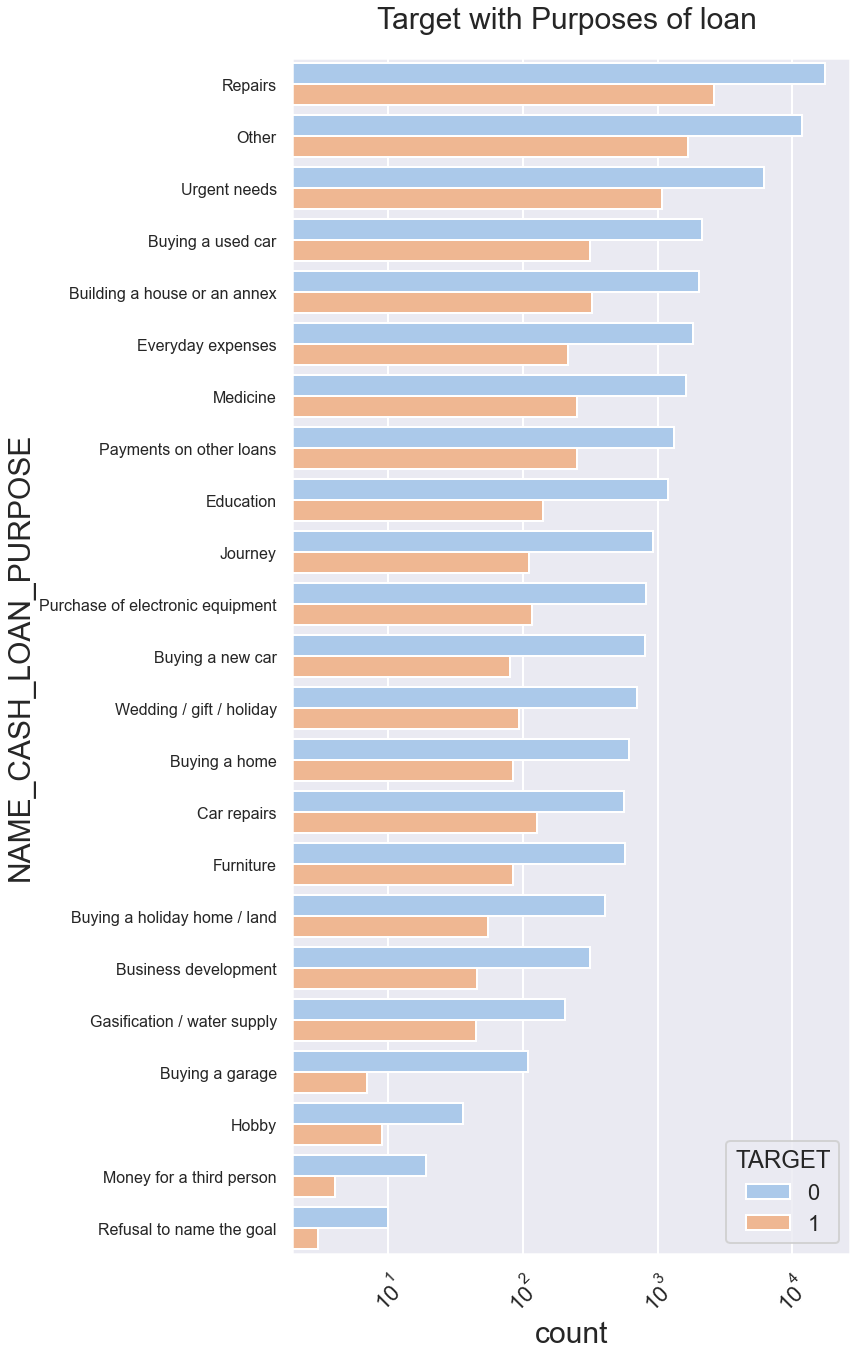

In [237]:

sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Target with Purposes of loan ')

ax = sns.countplot(data = updated, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=updated['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')

# Observation:
Repair is on the higher side

In Medicine there are high no. of customers having difficulties for re payement the loan amount  as compared to "Education"

Buying used Car" and Building purpose client having difficulties in payment have equal ratio

In [238]:
updated.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU

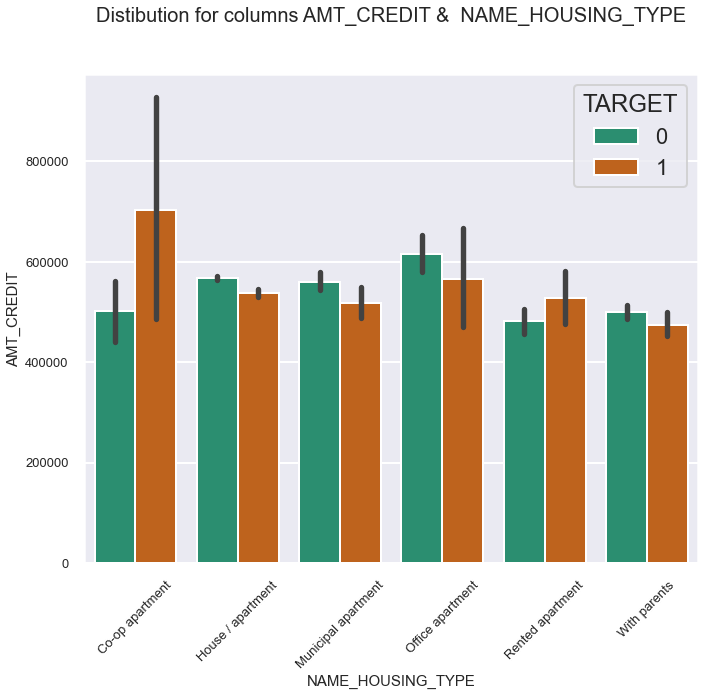

In [241]:
plt.figure(figsize=(11,9))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
sns.barplot(data=updated, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE',palette='Dark2')
plt.title("Distibution for columns AMT_CREDIT &  NAME_HOUSING_TYPE\n")
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13, rotation=360)
plt.show()

Observation:
Here, the office apartment has a higher target credit of 0 while the co-op apartment has a higher target credit of 1. We can therefore draw the conclusion that a bank should refrain from lending to the co-op apartment building type because of their payment issues. For successful payments, the bank can concentrate primarily on the type of residence, such as a house, an apartment, or a municipal apartment.

# Conclusion

When we compare the percentages of both Payment Difficulties and non-Payment Difficulties, we see a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working.

When compared to the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties, we find a drop in the married and widowed with Loan Payment Difficulties and an increase in the single and civil married with Loan Payment Difficulties.

When compared to the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties, we notice a rise in the percentage of Loan Payment Difficulties with secondary/secondary special educational qualifications and a decline in the percentage of Loan Payment Difficulties with a higher education.



Low skilled labourers make up a very small portion of the "OCCUPATION TYPE" population, and they also experience the highest percentage of payment troubles, or about 17%. Therefore, clients who work as "Low Skilled Laborers" are the main causes of Loan Defaulters.

Lower Secondary enrollment in "NAME EDUCATION TYPE" is comparably quite low, and it also has the highest percentage of payment difficulties—around 11%. Clients with the education type "Lower Secondary" are therefore the main causes of loan defaulters.

Banks ought to concentrate more on contract type For effective payments, students, pensioners, and businesspeople should live in a type of housing other than a co-op apartment or an office flat.


Low skilled labourers make up a very small portion of the "OCCUPATION TYPE" population, and they also receive the highest percentage of compensation.
Additionally, Loan Purpose Repair experiences a higher rate of late payments.

Obtain as many customers as possible from the housing category with parents since they have the fewest failed payments.